In [176]:
import sys
import os
import glob
import pylab as plt
import numpy as np
from pylab import rcParams
from blimpy import Filterbank,Waterfall

In [200]:
ant = '4j'
data_dir = "./data"
images_dir = "./images"

In [201]:
# Get all the data file names and create a sorted list of frequencies
freqs = set()
file_list = glob.glob("./data/*" + ant + "*.fil")
for fname in file_list:
    #print(fname)
    parts = fname.split(".")[1].split("_")
    #print(parts)
    freq = parts[-1]
    #print(freq)
    freqs.add(int(freq))
    
freq_list = list(freqs)
freq_list.sort()
print(freq_list)


    

[432, 504, 576, 648, 720, 792, 864, 936, 1008, 1080, 1152, 1224, 1296, 1368, 1440, 1512, 1584, 1656, 1728, 1800, 1872, 1944, 2016, 2088, 2160, 2232, 2304, 2376, 2448, 2520, 2592, 2664, 2736, 2808, 2880, 2952, 3024, 3096, 3168, 3240, 3312, 3384, 3456, 3528, 3600, 3672, 3744, 3816, 3888, 3960, 4032, 4104, 4176, 4248, 4320, 4392, 4464, 4536, 4608, 4680, 4752, 4824, 4896, 4968, 5040, 5112, 5184, 5256, 5328, 5400, 5472, 5544, 5616, 5688, 5760, 5832, 5904, 5976, 6048, 6120, 6192, 6264, 6336, 6408, 6480, 6552, 6624, 6696, 6768, 6840, 6912, 6984, 7056, 7128, 7200, 7272, 7344, 7416, 7488, 7560, 7632, 7704, 7776, 7848, 7920, 7992, 8064, 8136, 8208, 8280, 8352, 8424, 8496, 8568, 8640, 8712, 8784, 8856, 8928, 9000, 9072, 9144, 9216, 9288, 9360, 9432, 9504, 9576, 9648, 9720, 9792, 9864, 9936, 10008]


In [202]:
# Set the plot size
rcParams['figure.figsize'] = 20, 6

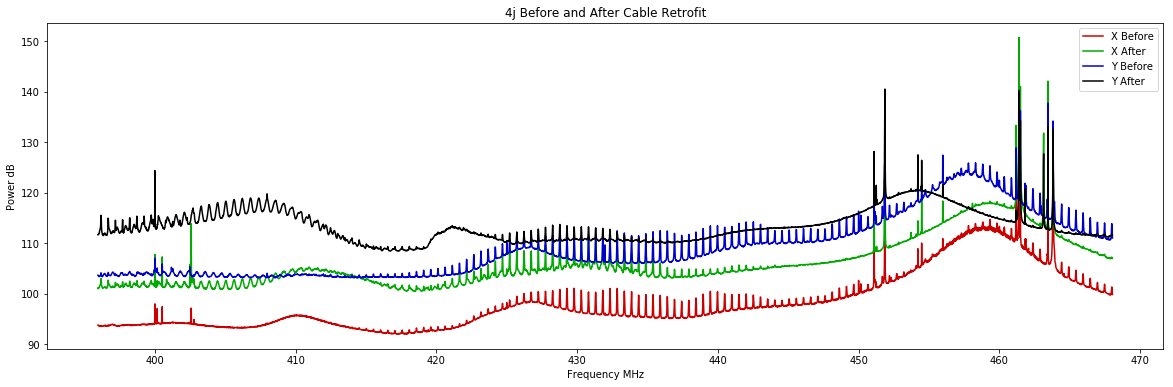

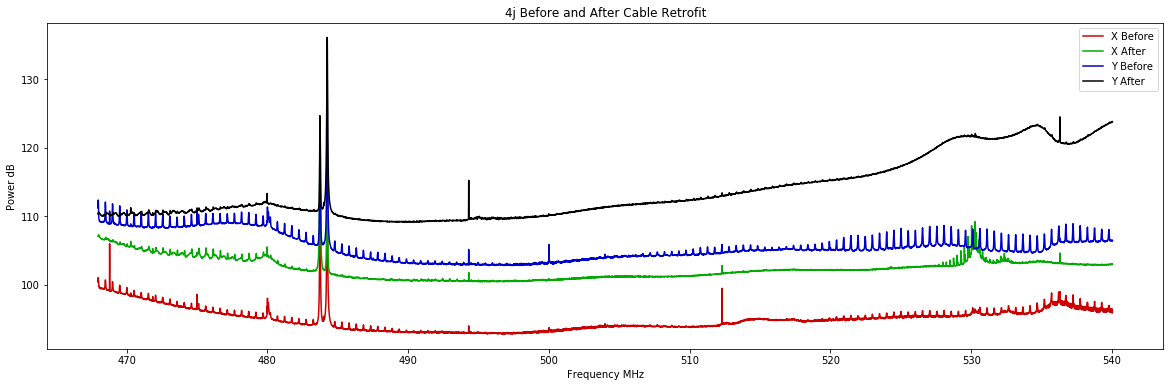

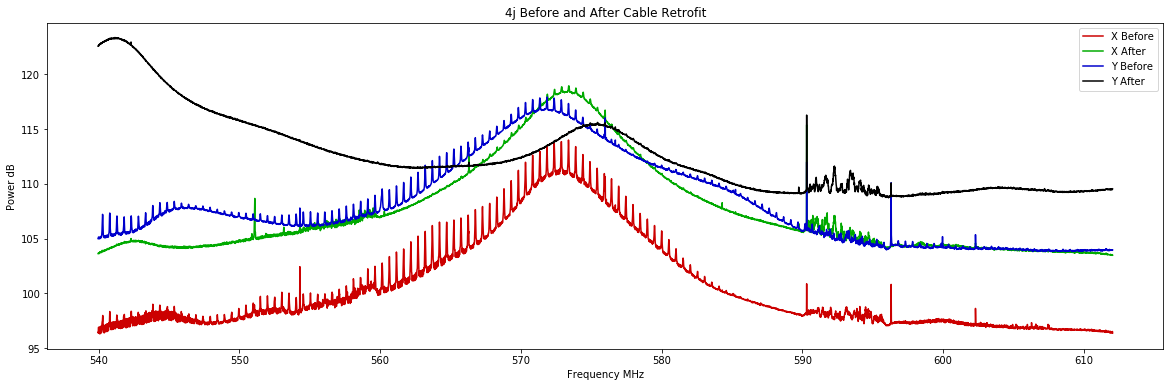

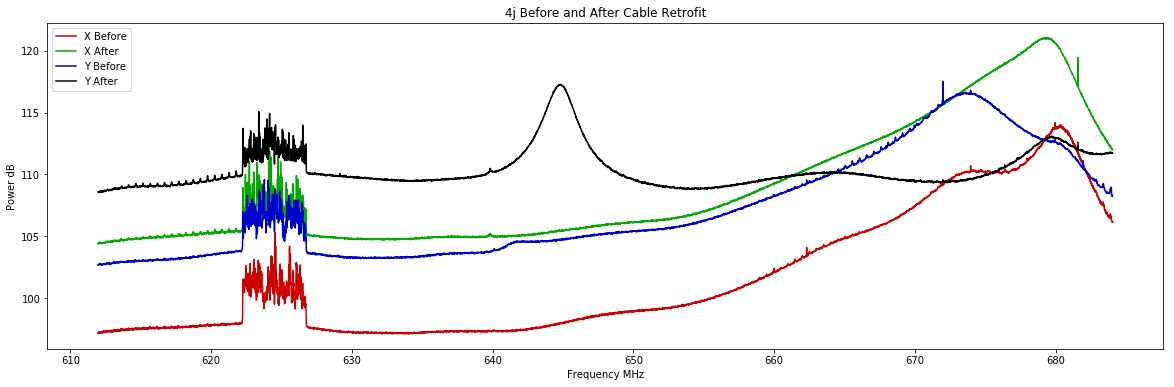

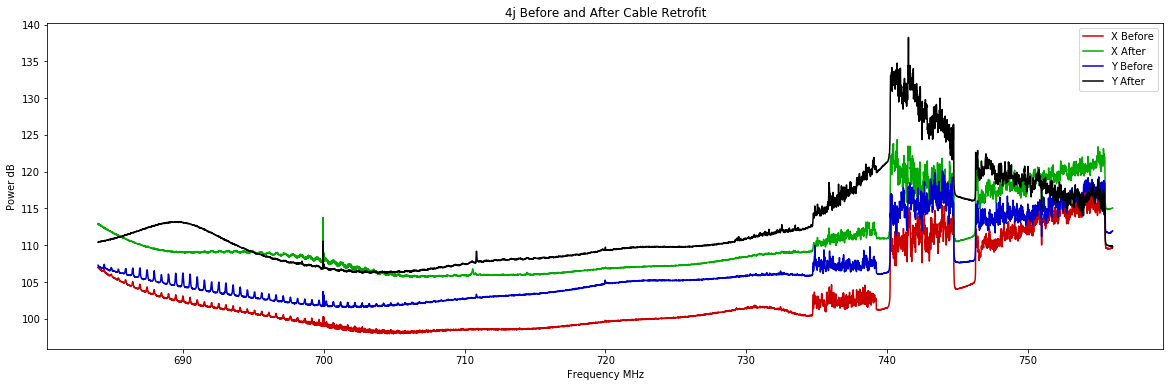

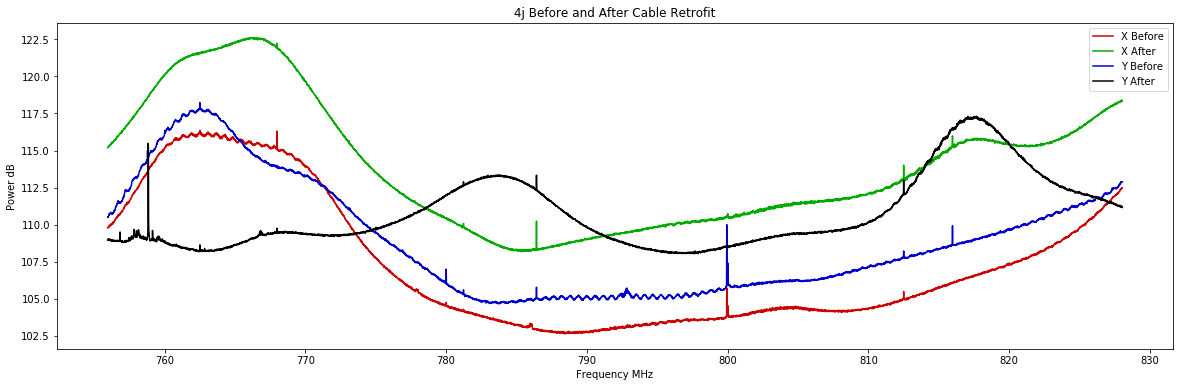

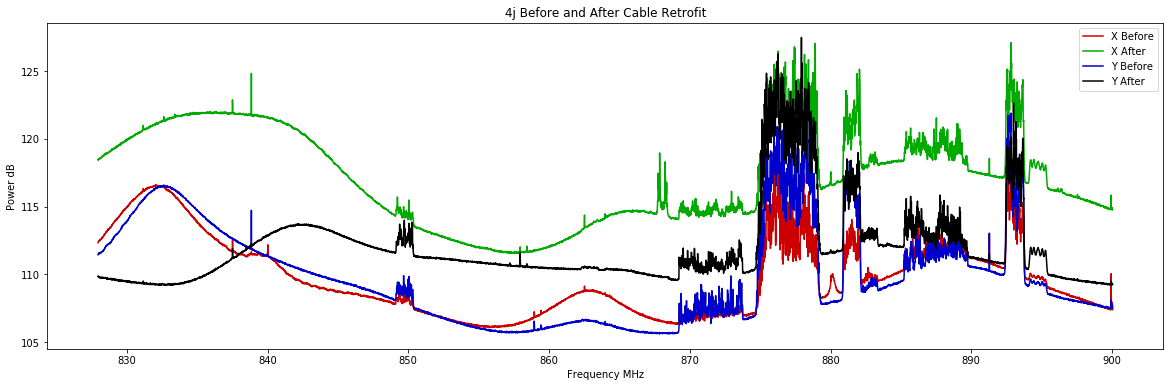

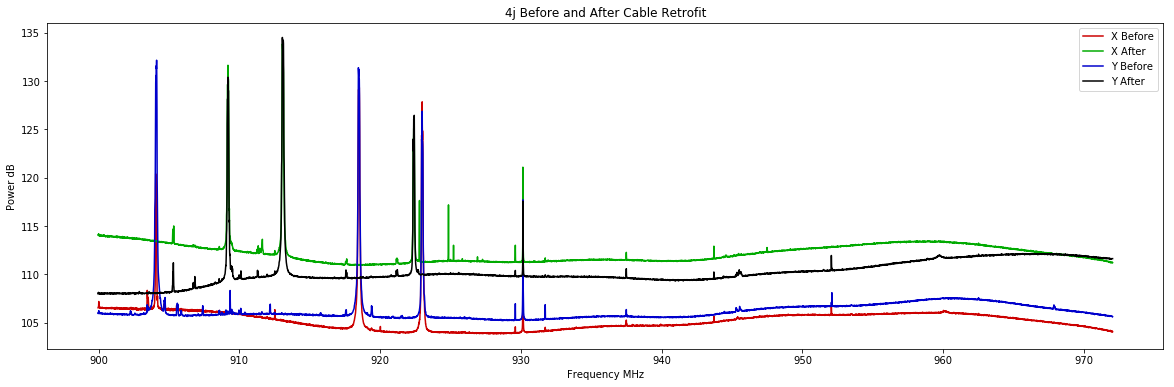

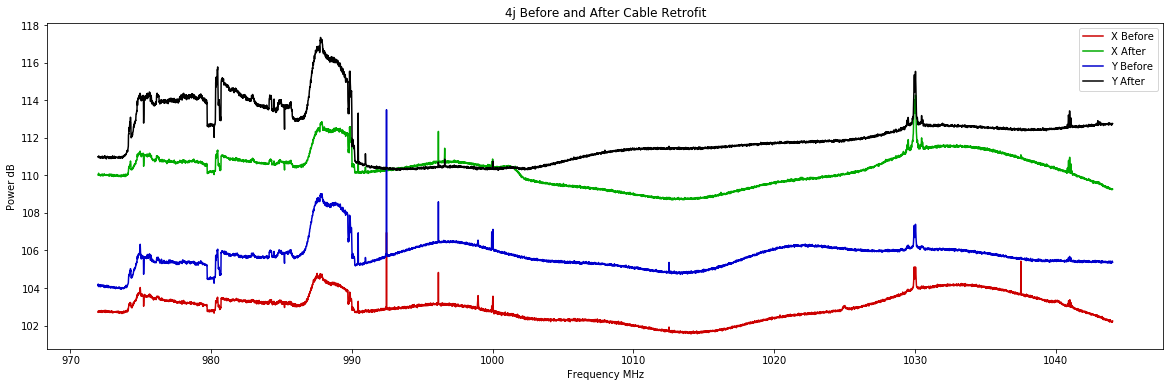

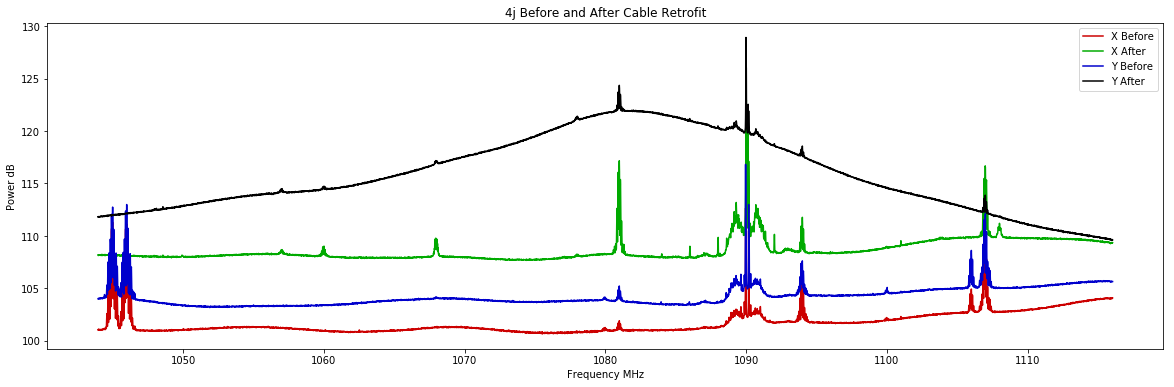

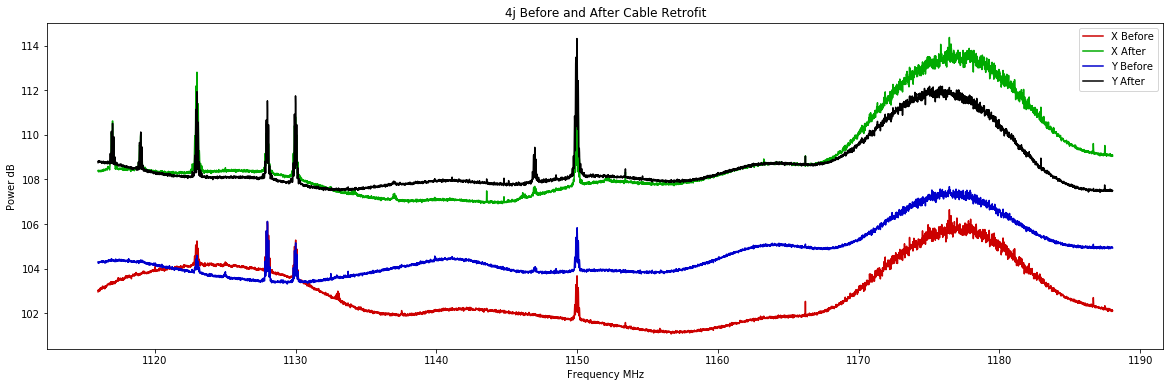

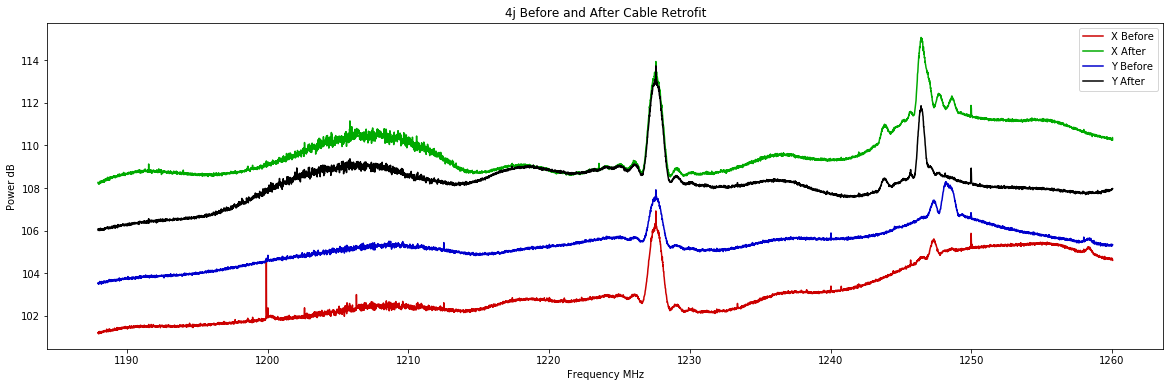

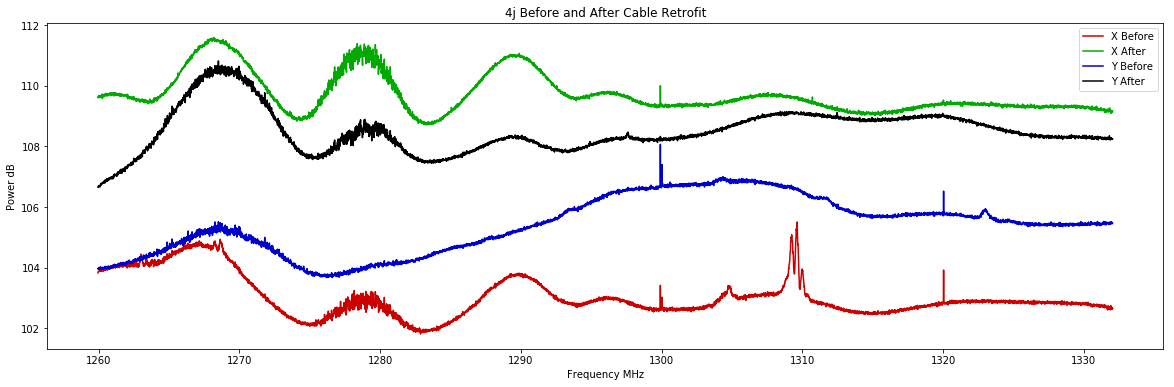

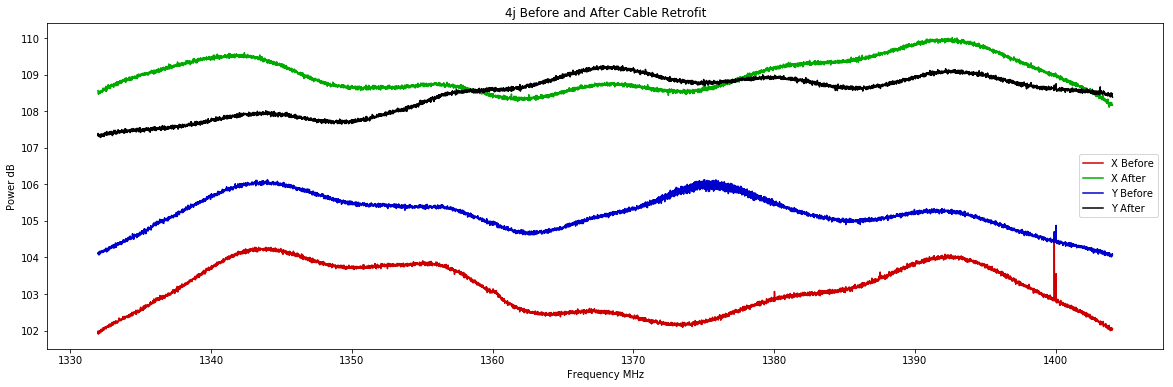

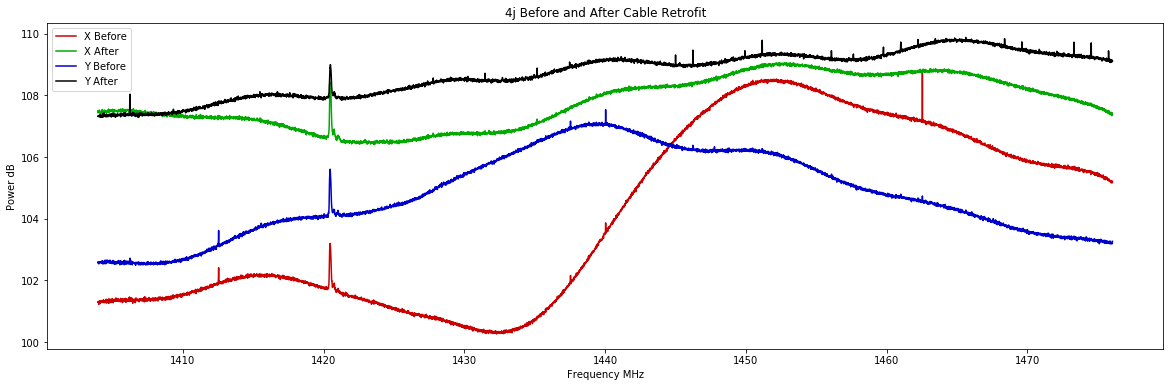

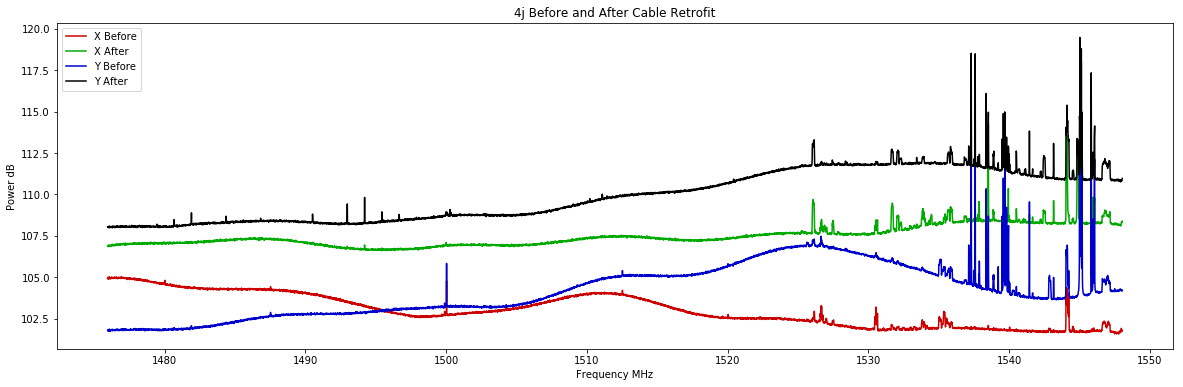

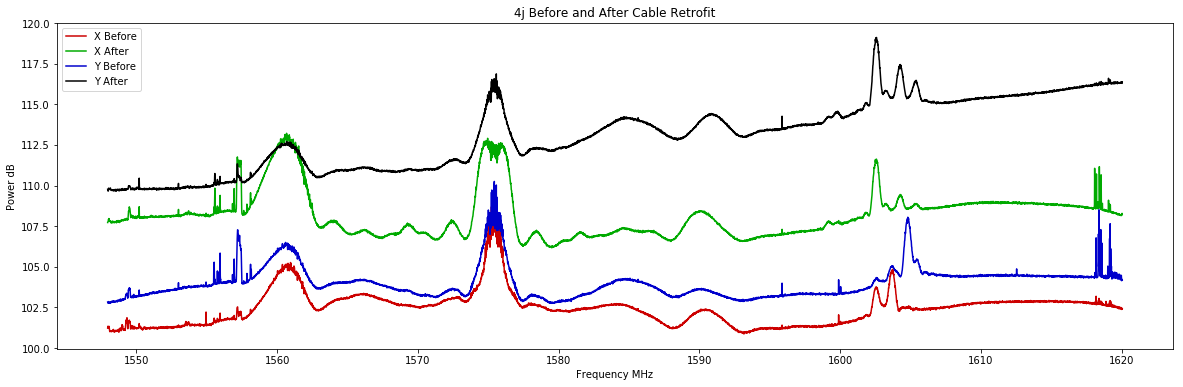

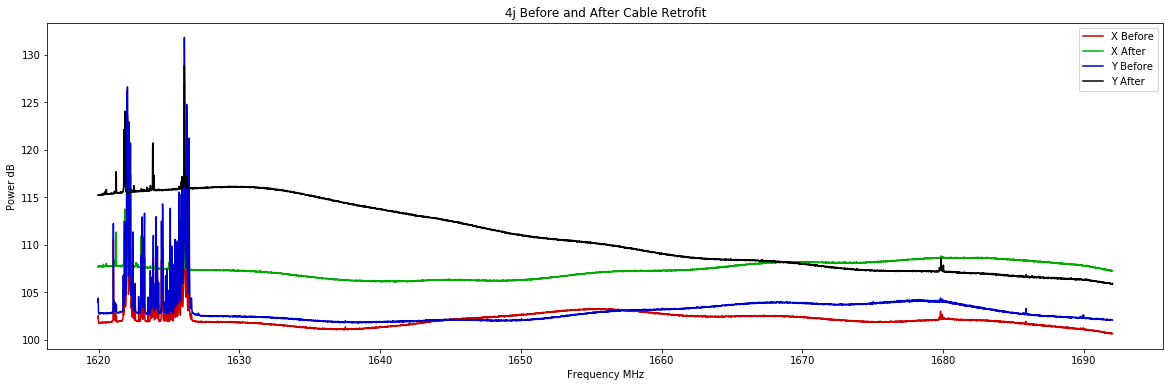

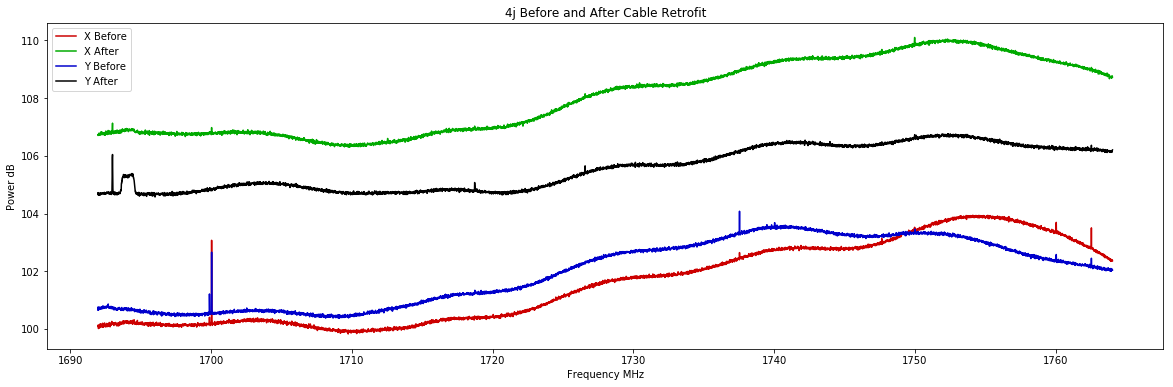

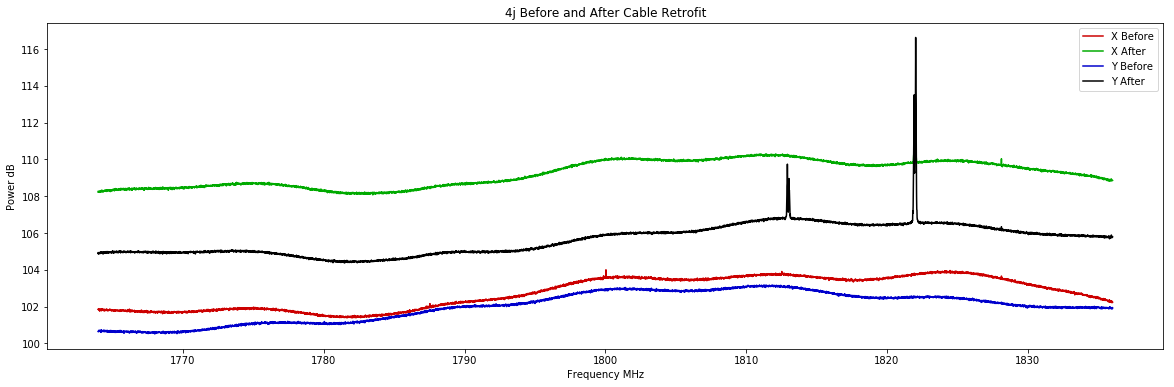

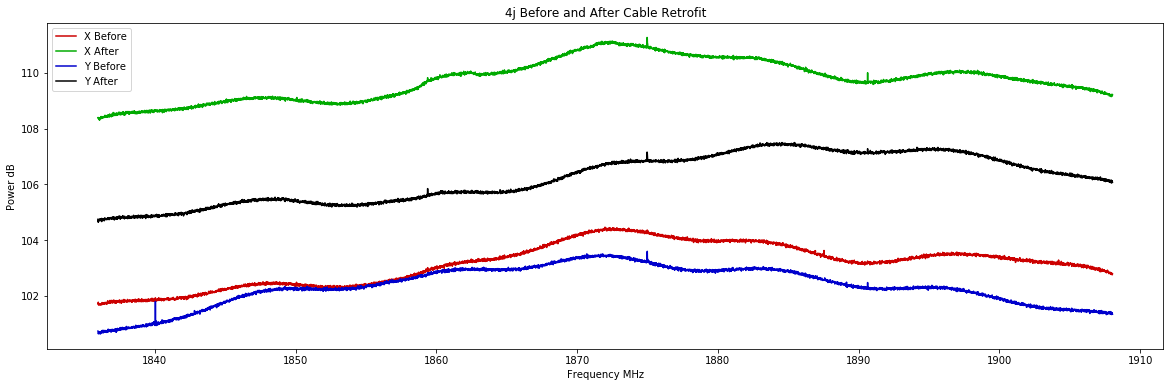

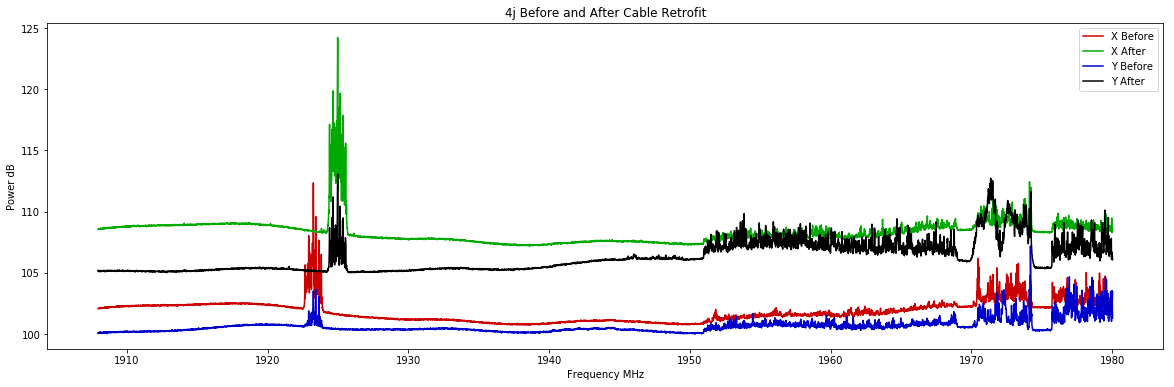

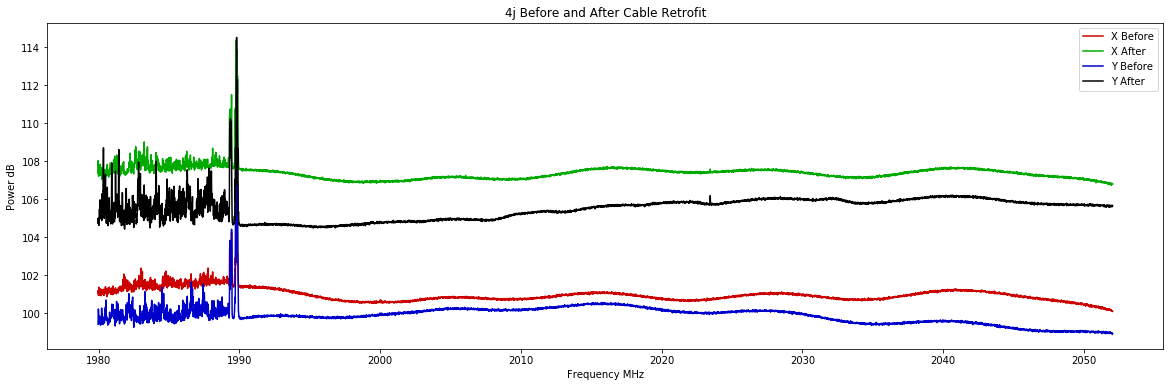

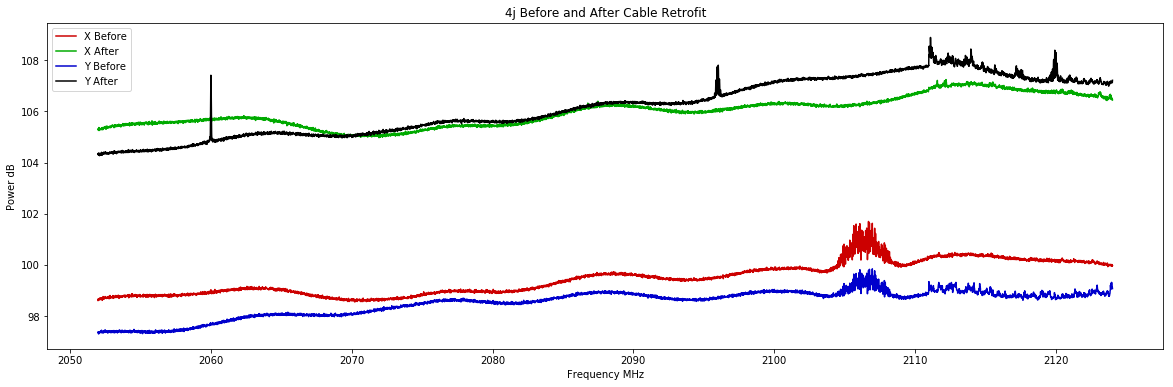

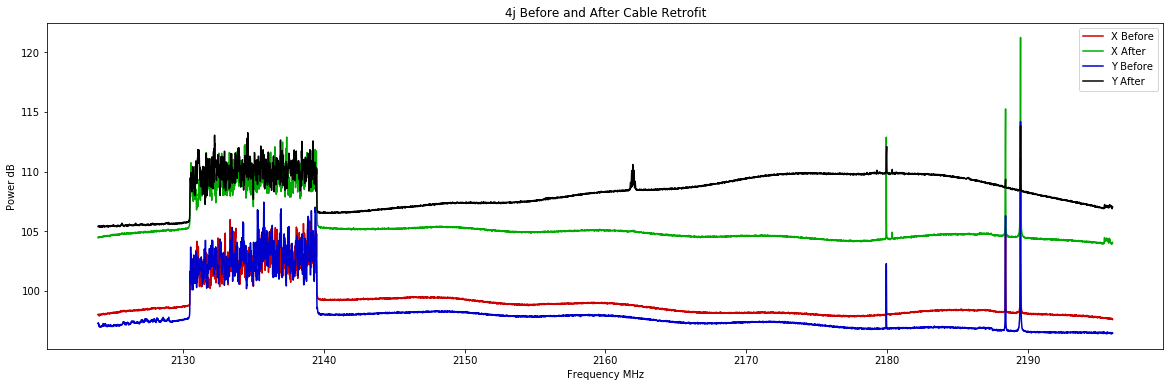

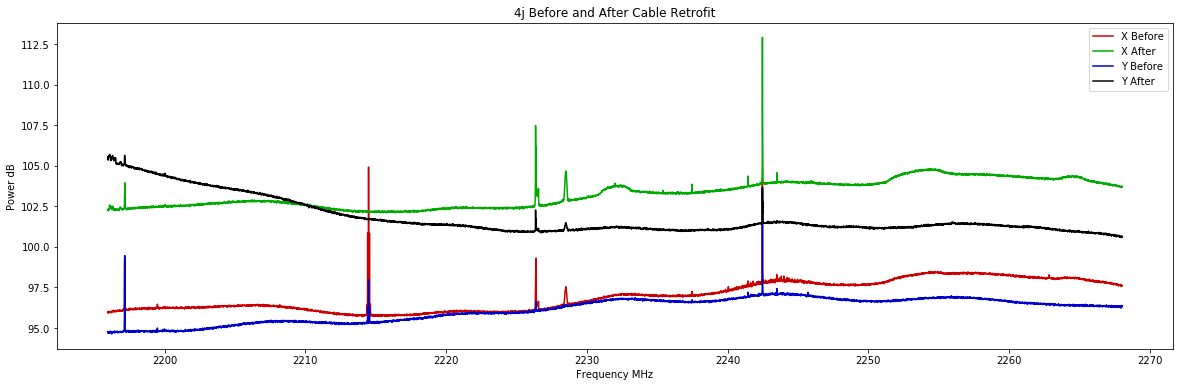

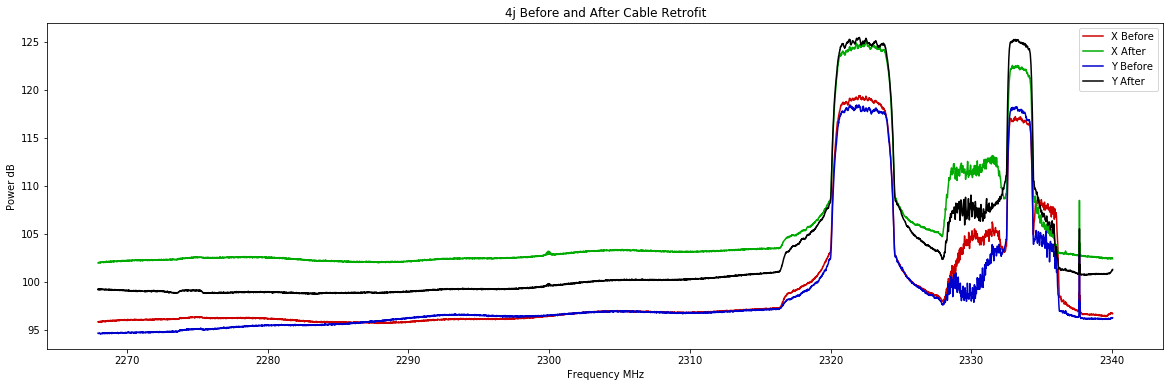

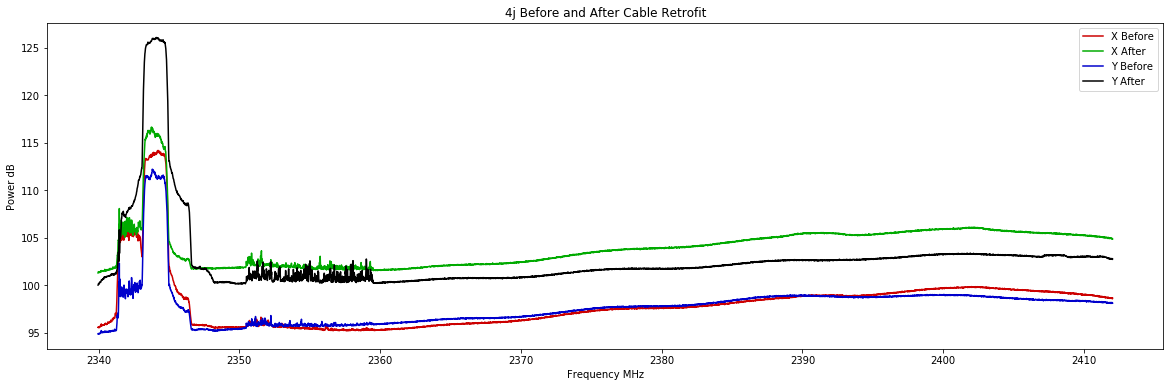

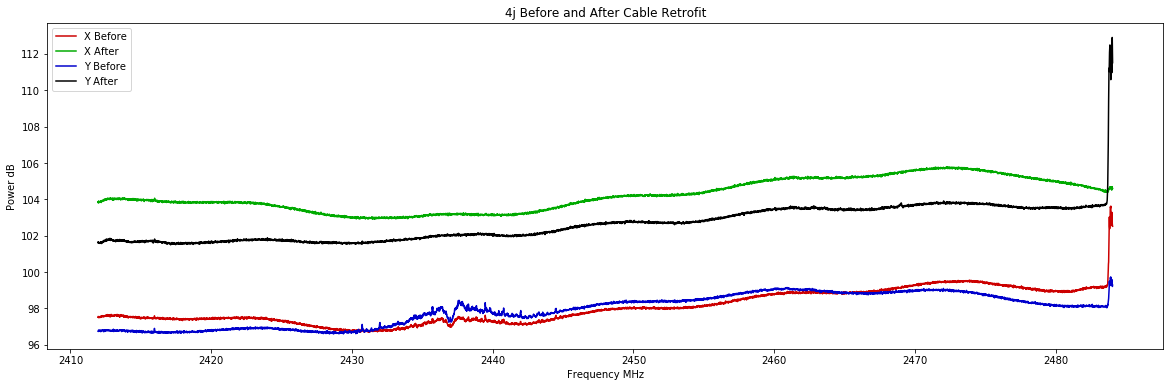

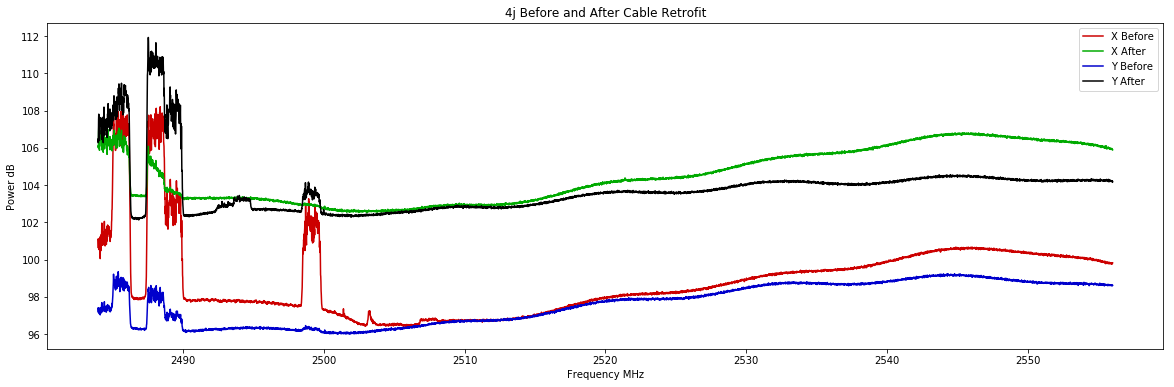

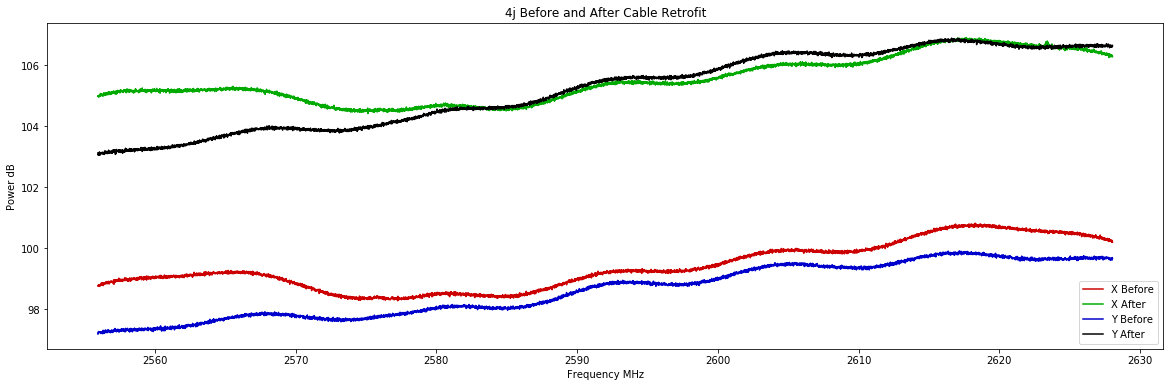

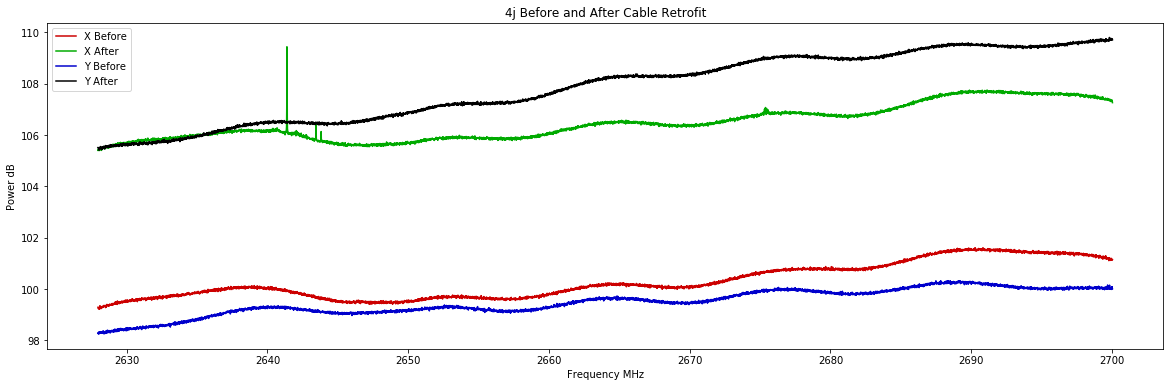

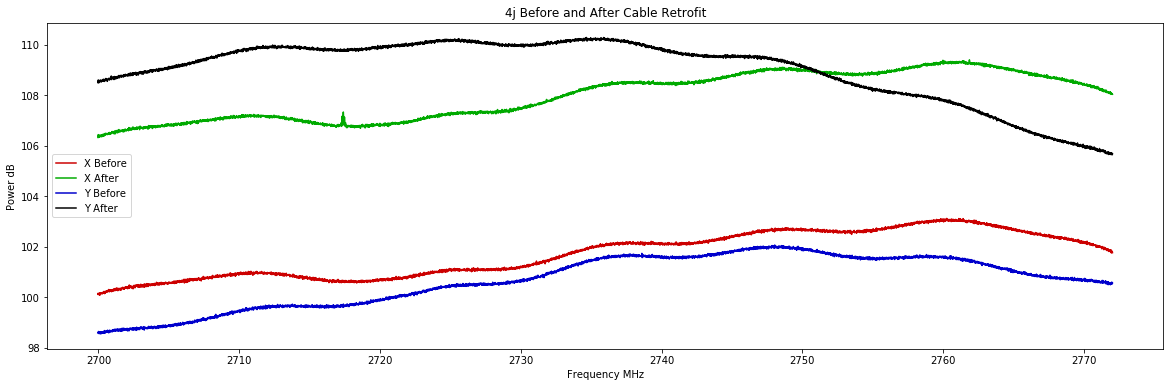

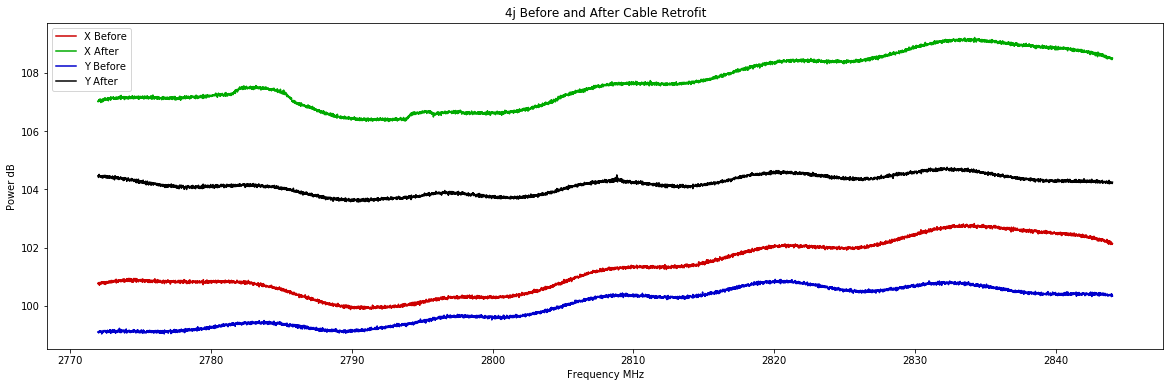

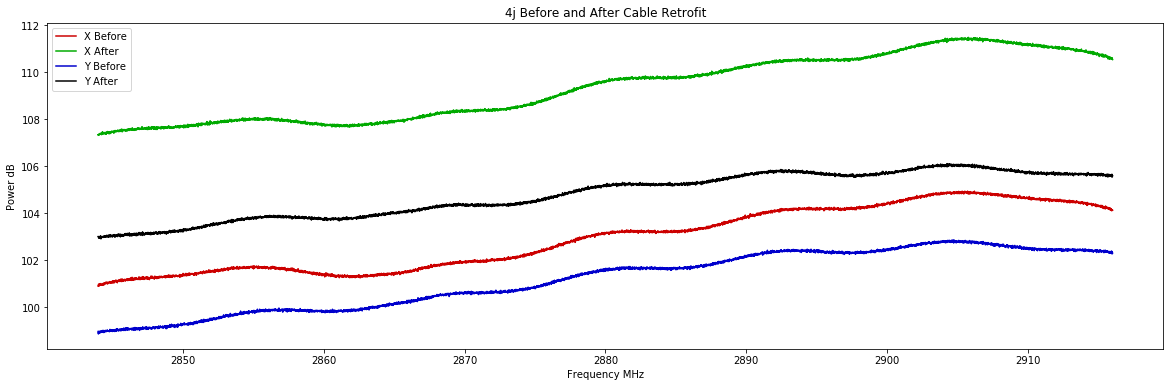

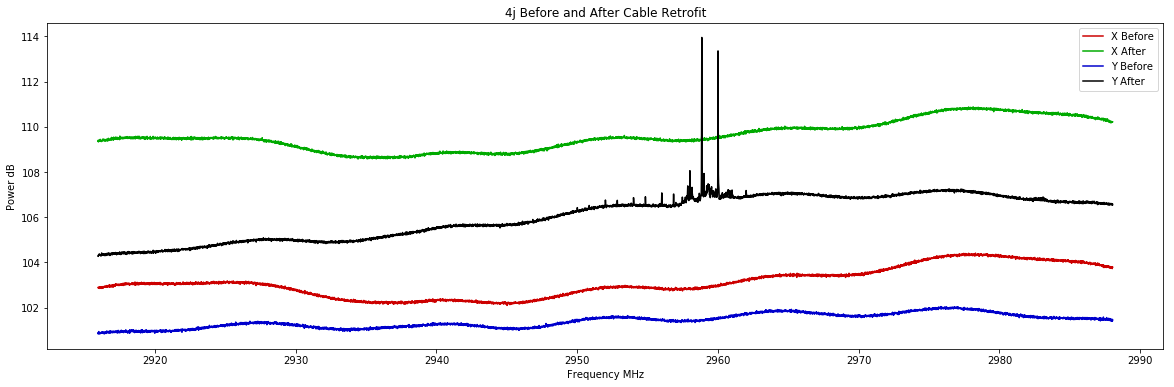

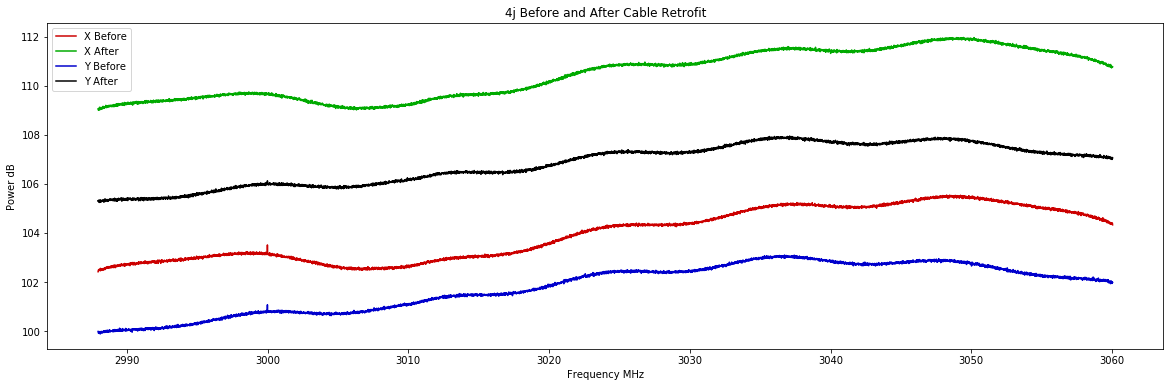

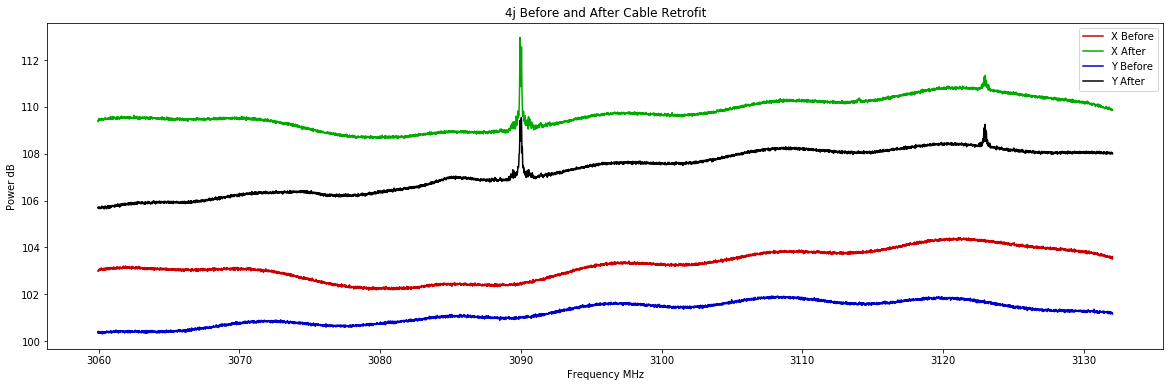

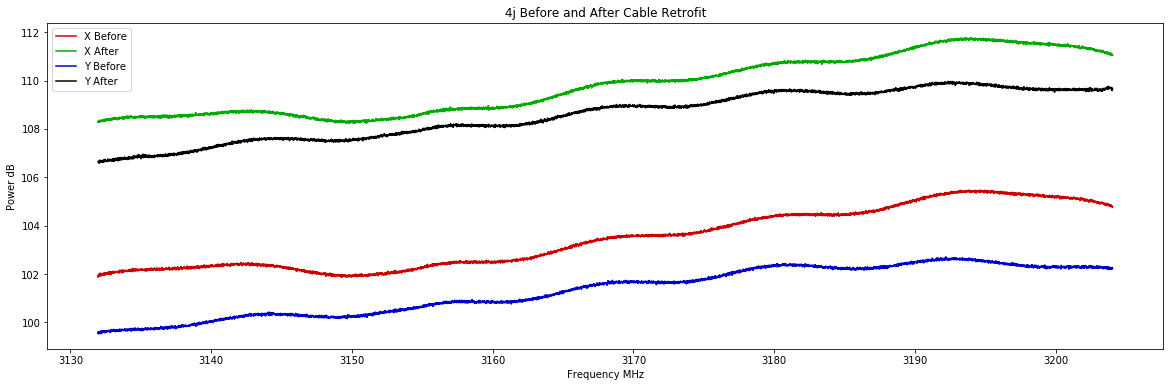

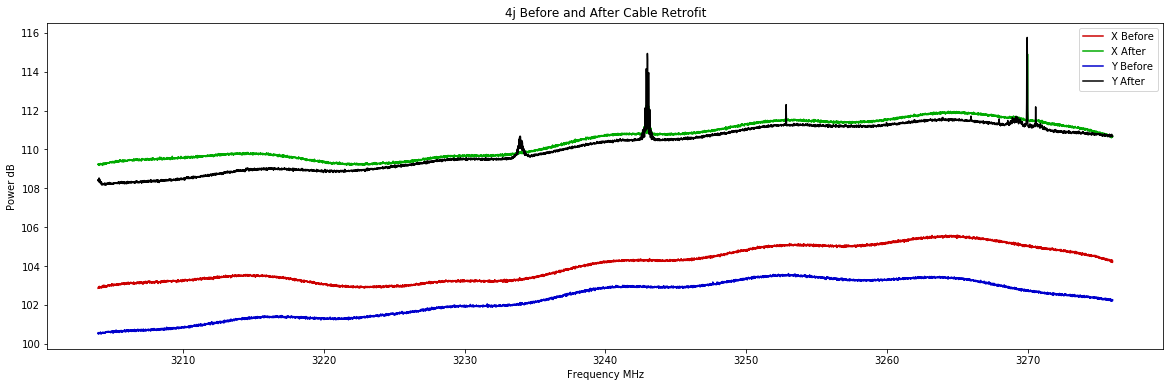

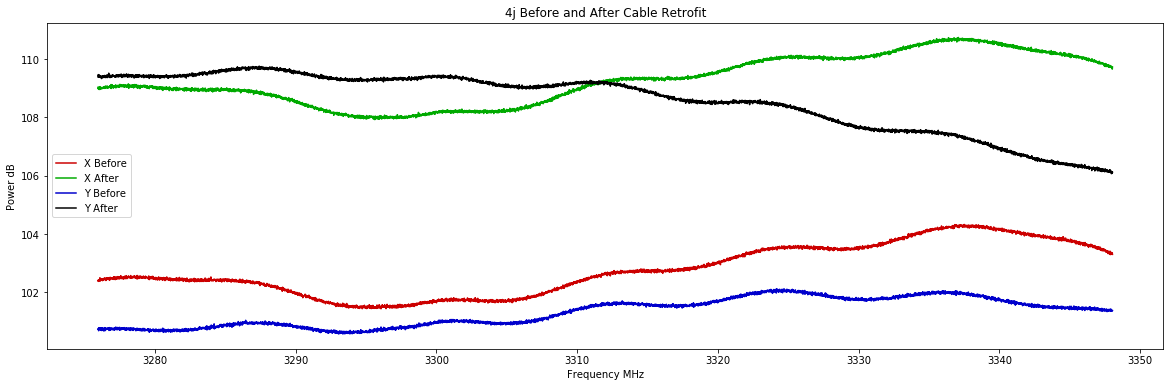

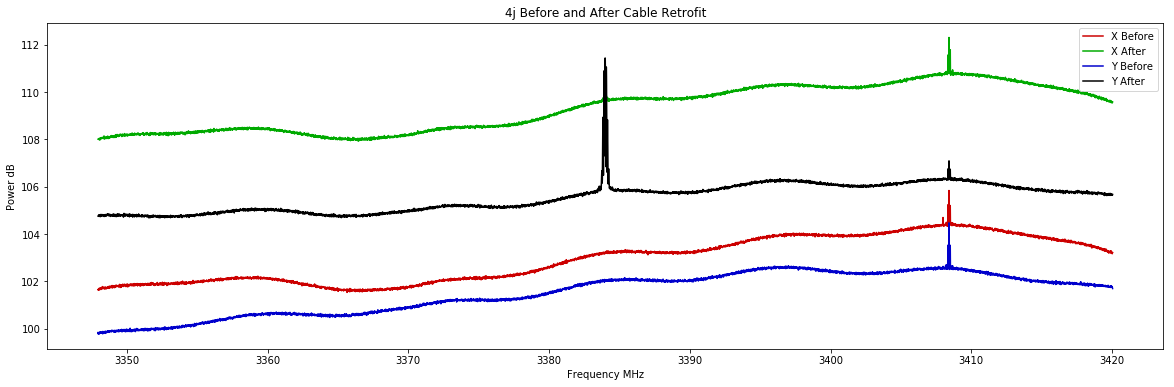

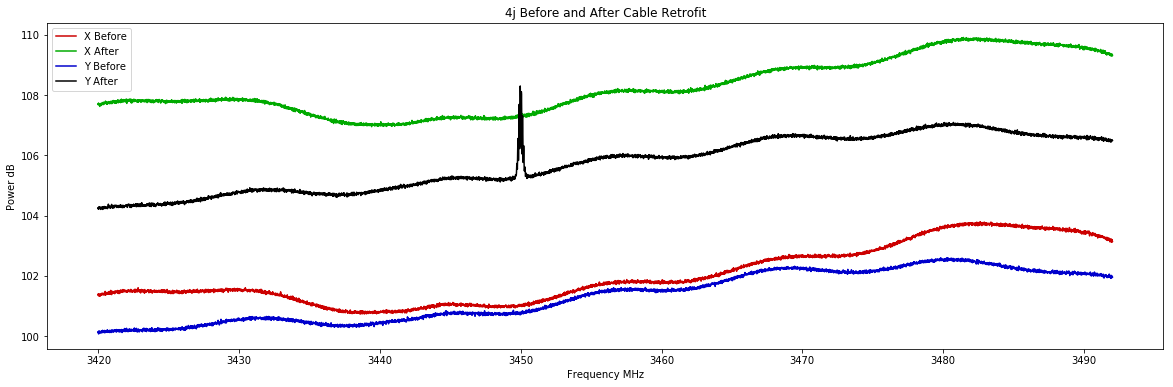

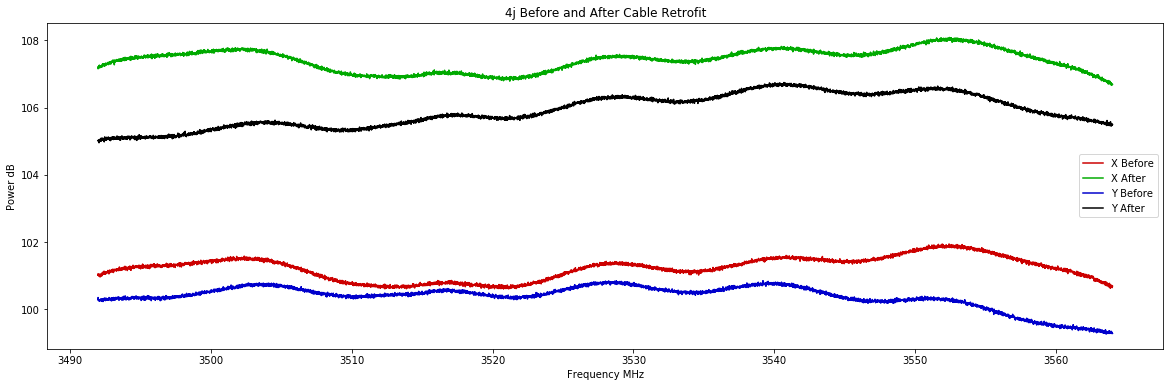

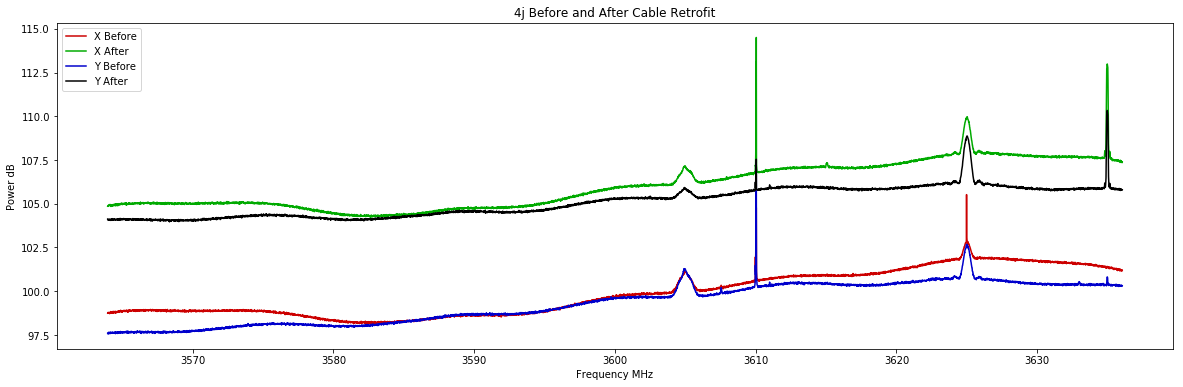

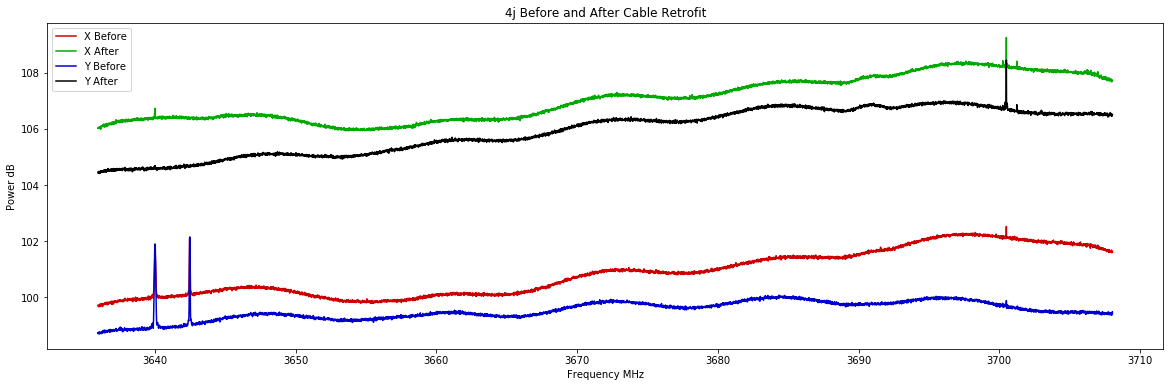

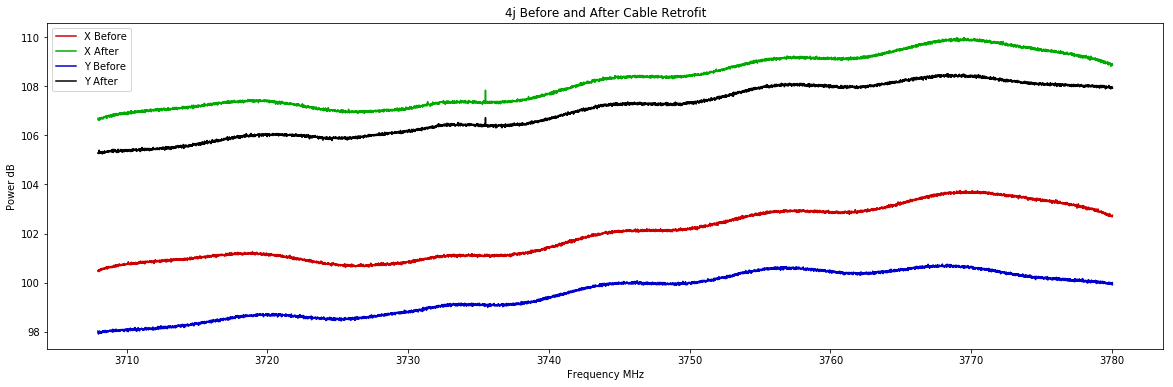

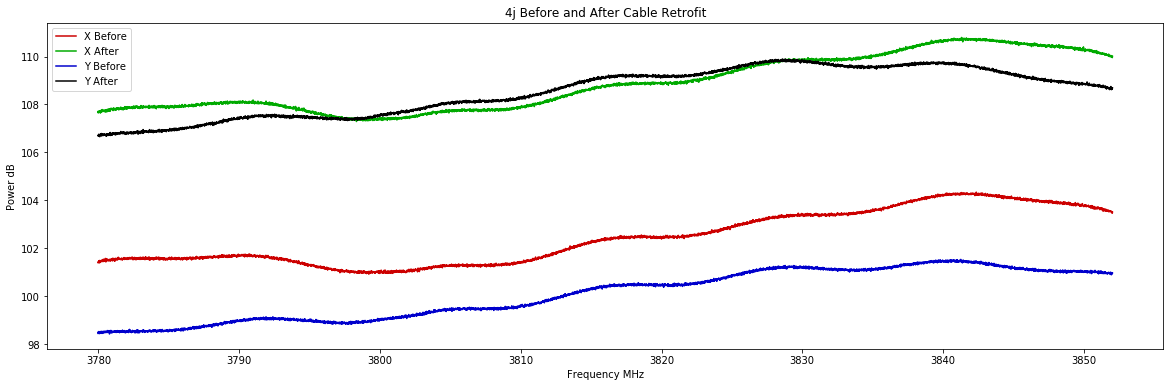

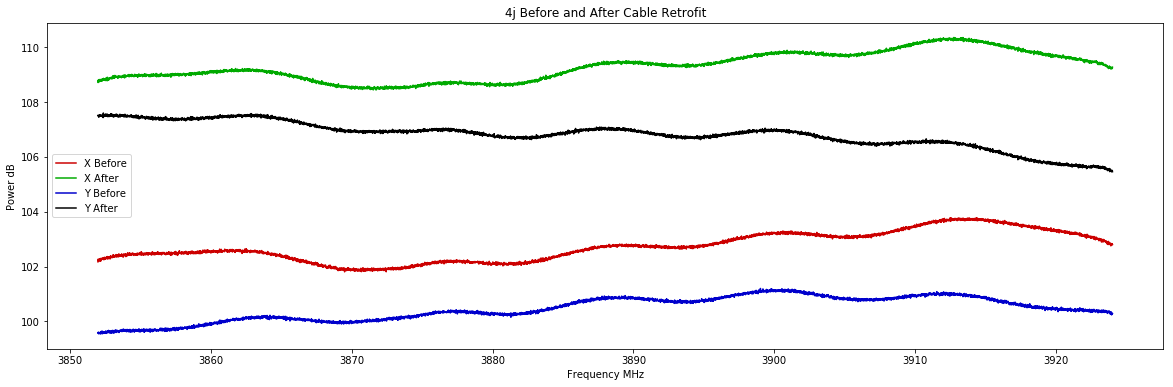

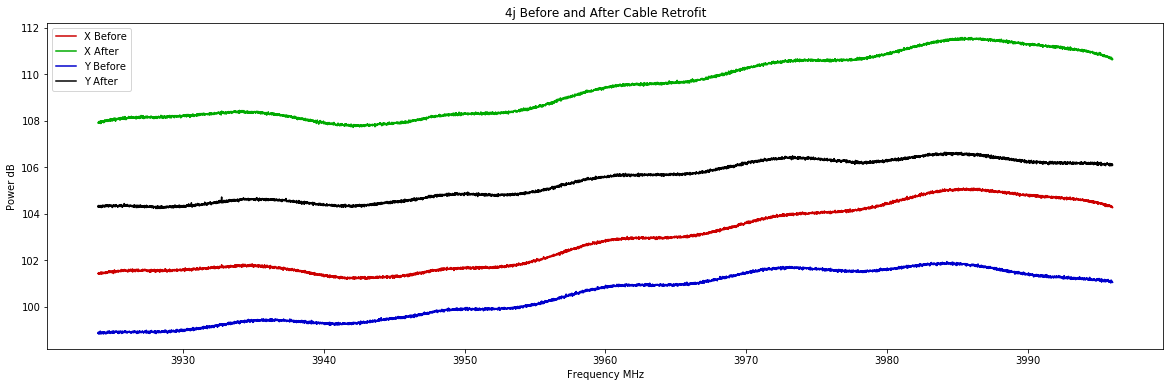

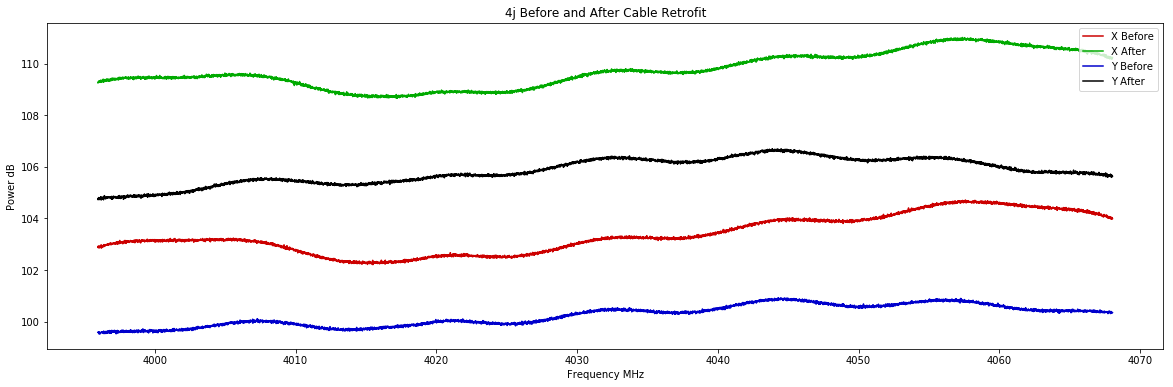

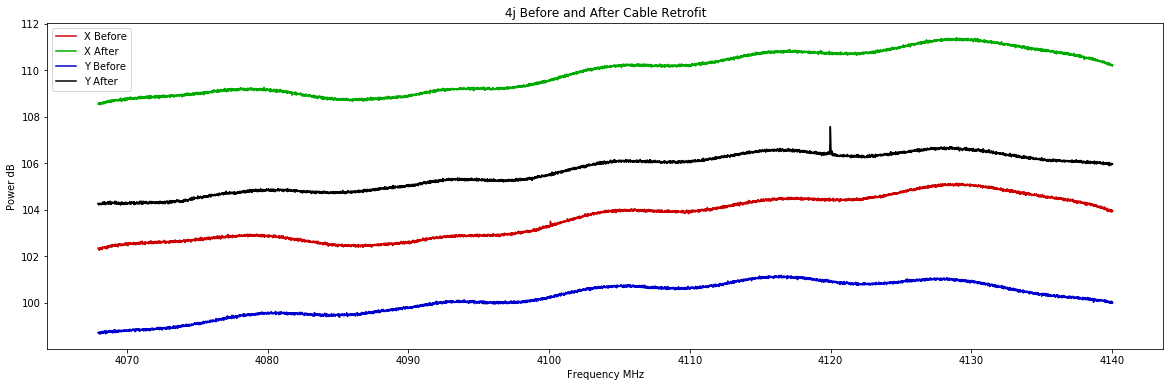

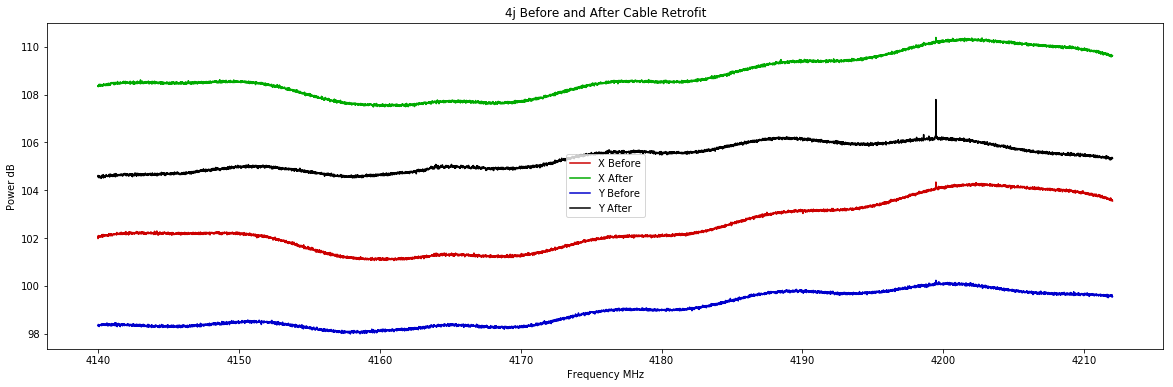

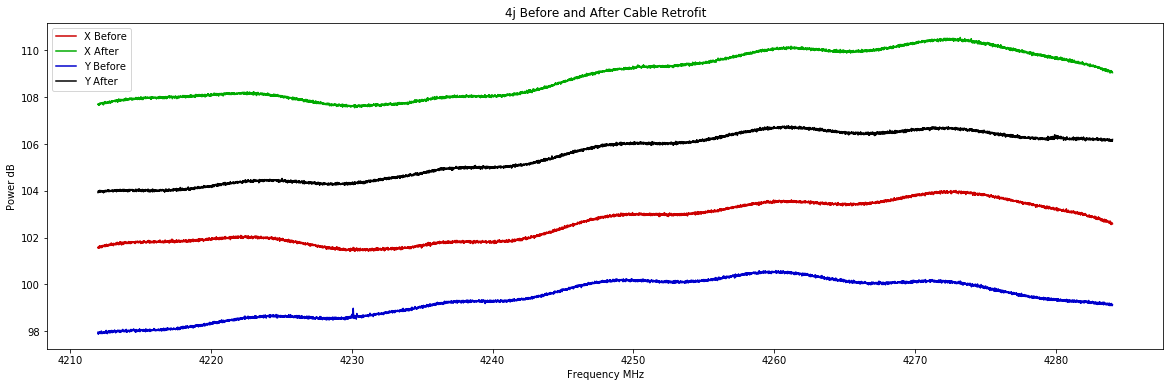

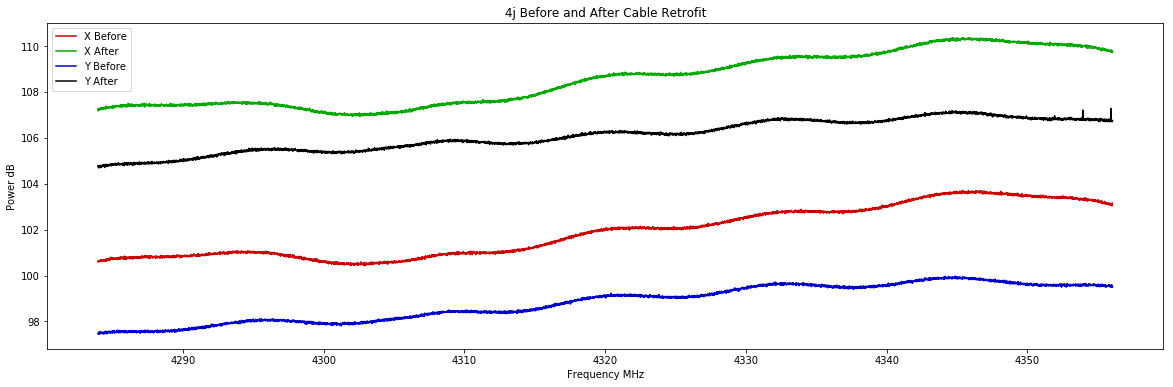

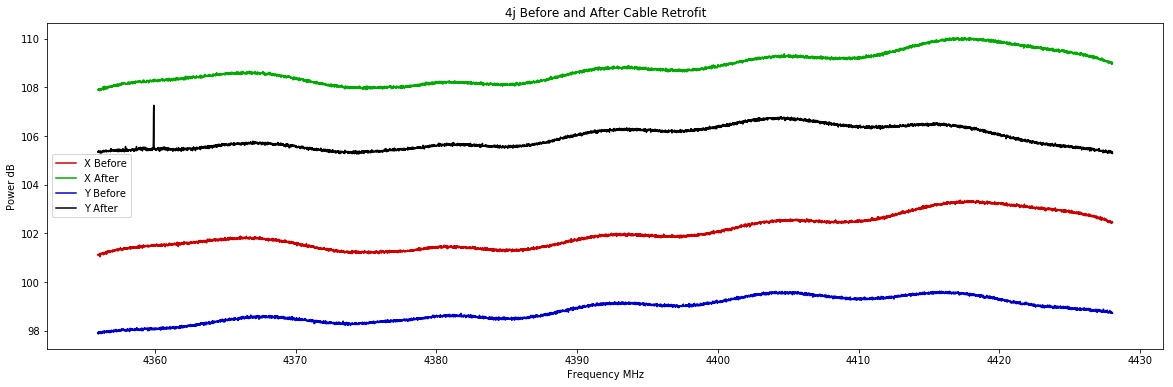

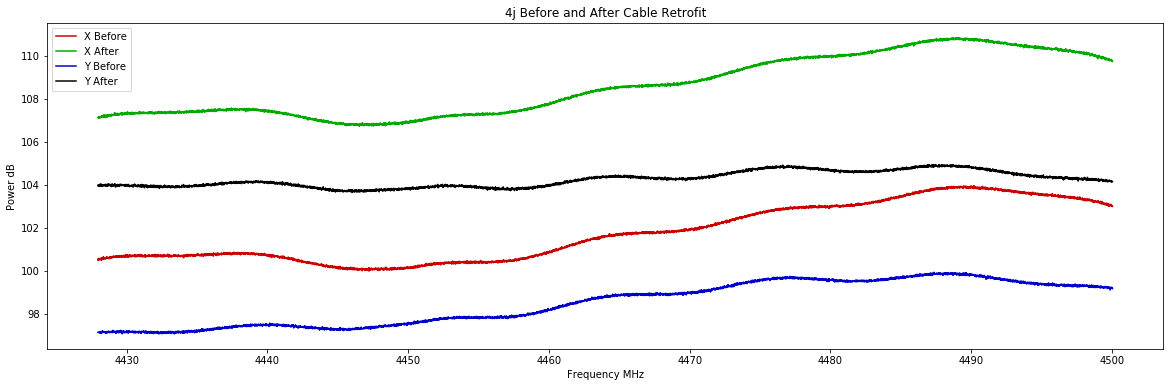

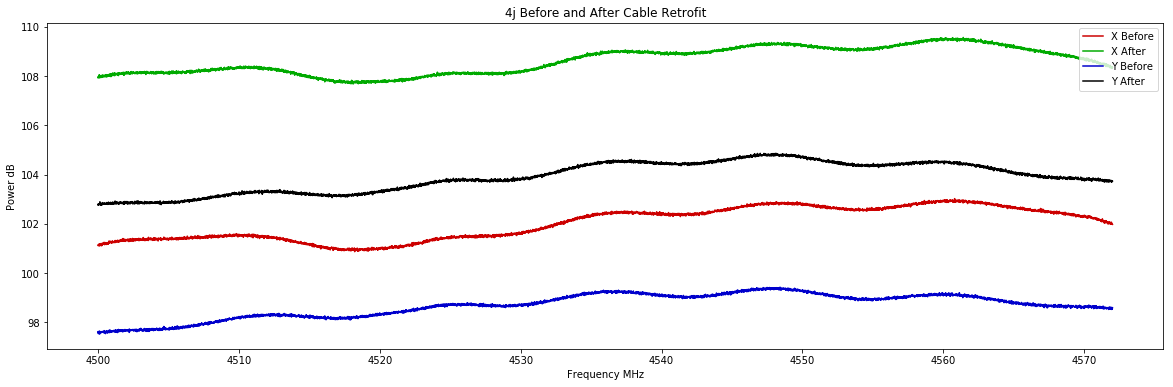

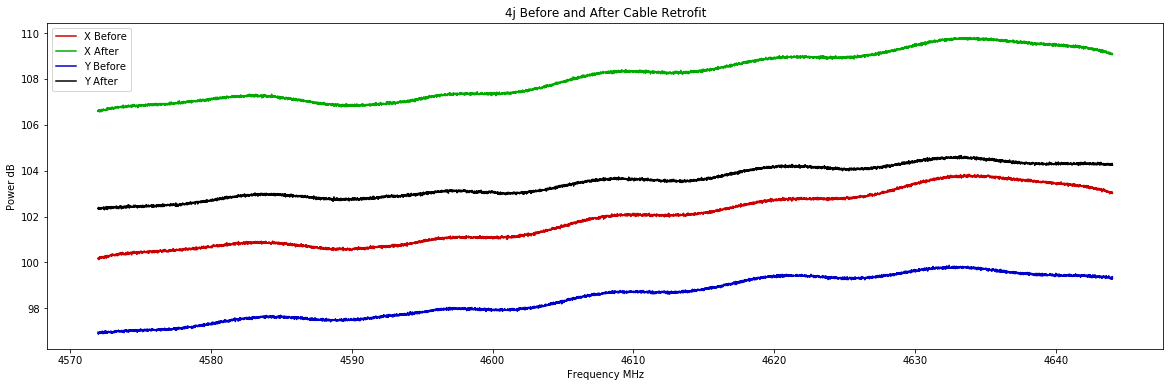

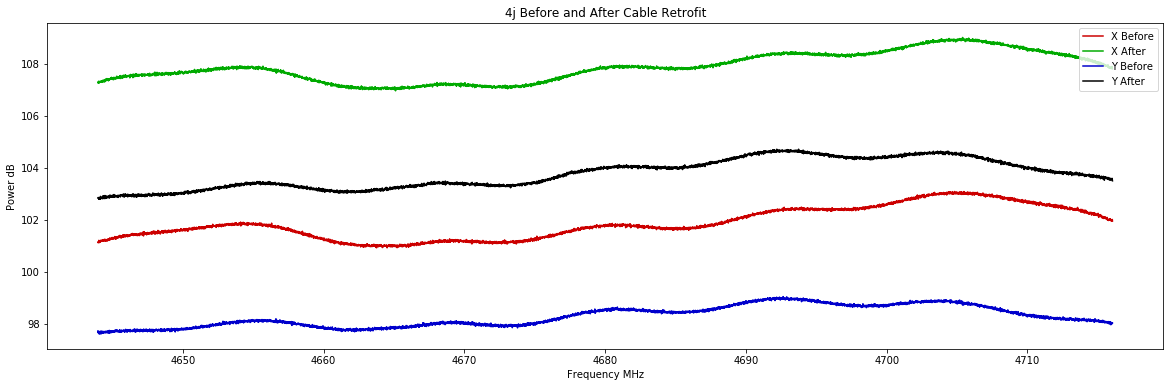

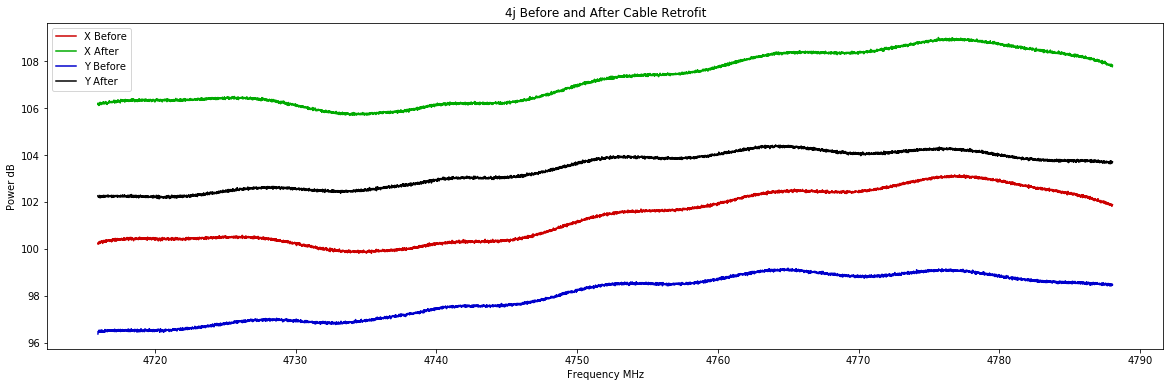

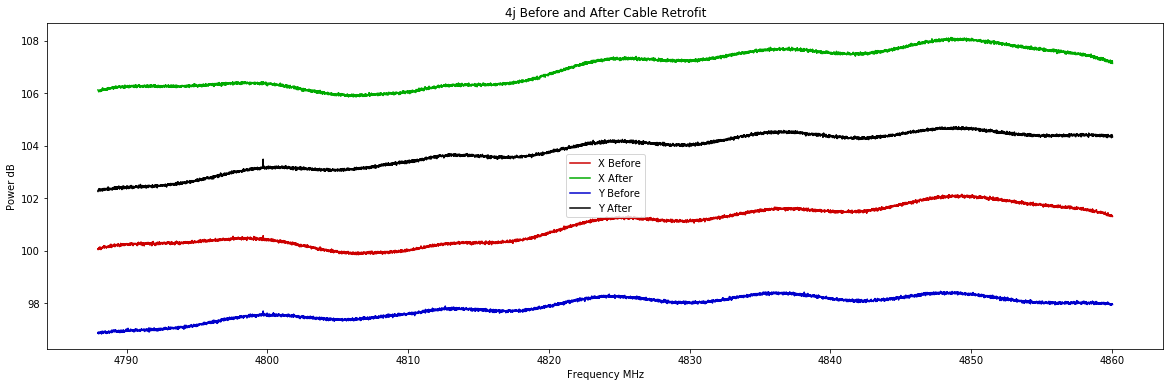

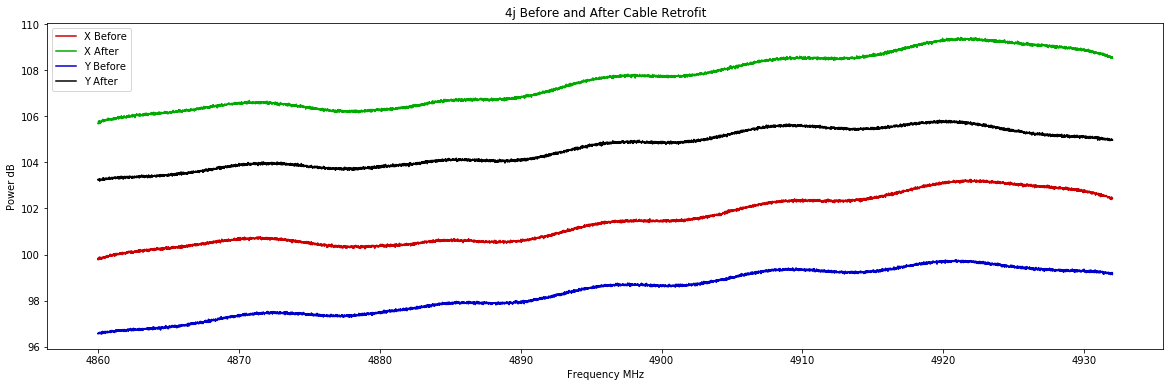

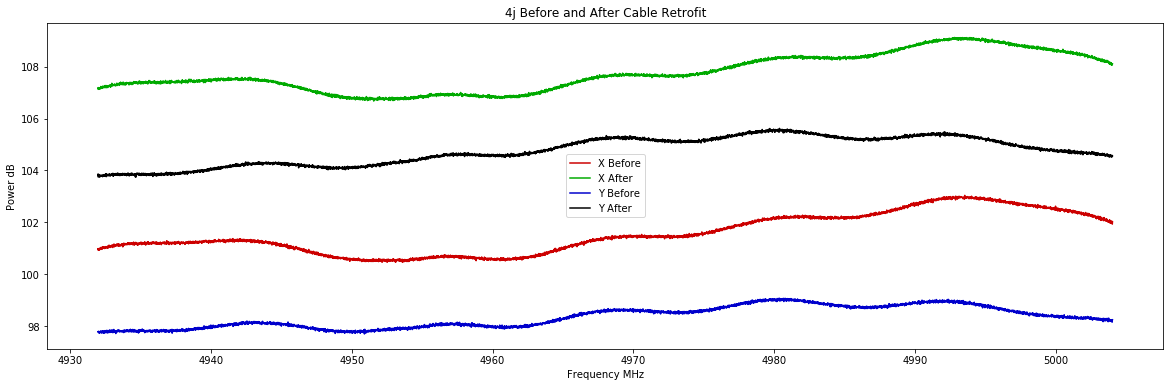

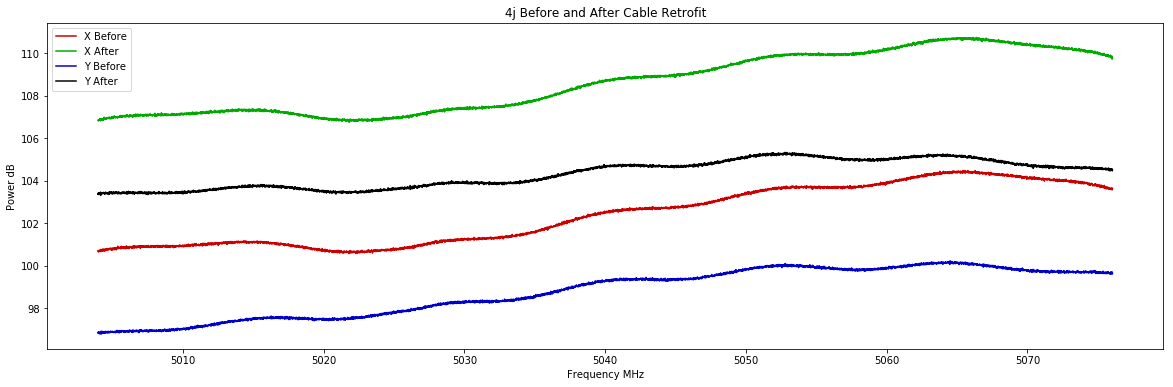

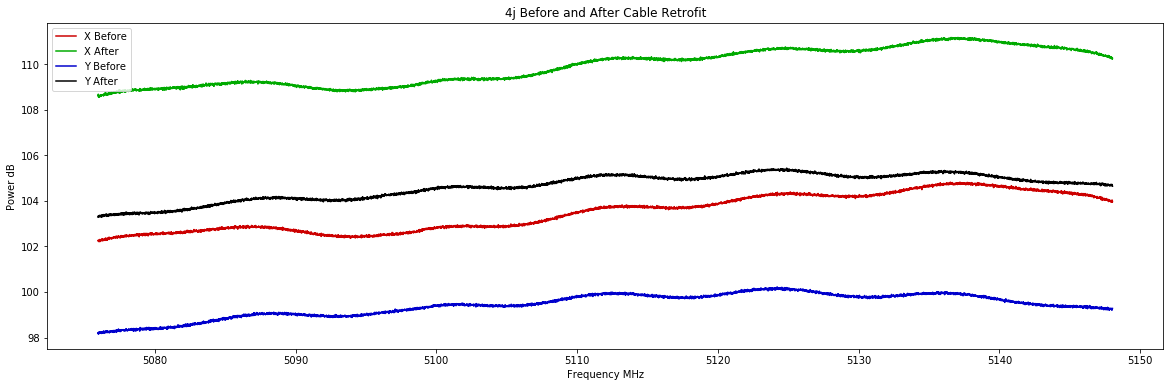

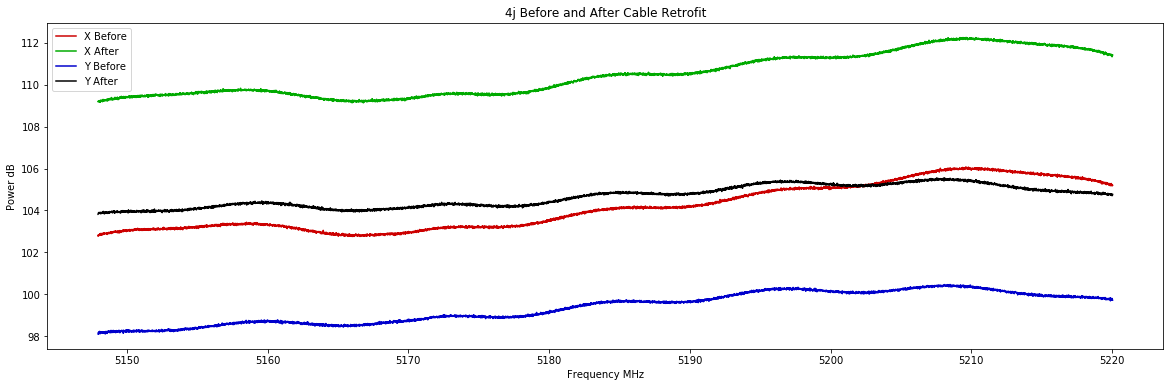

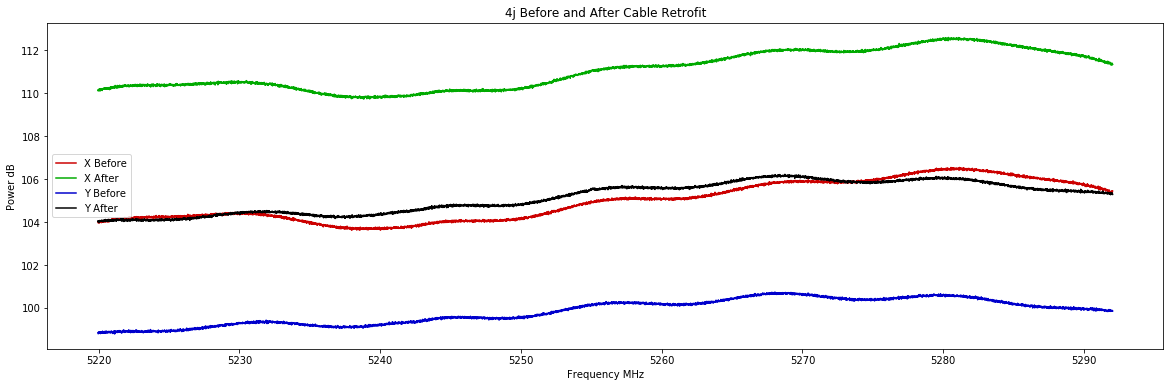

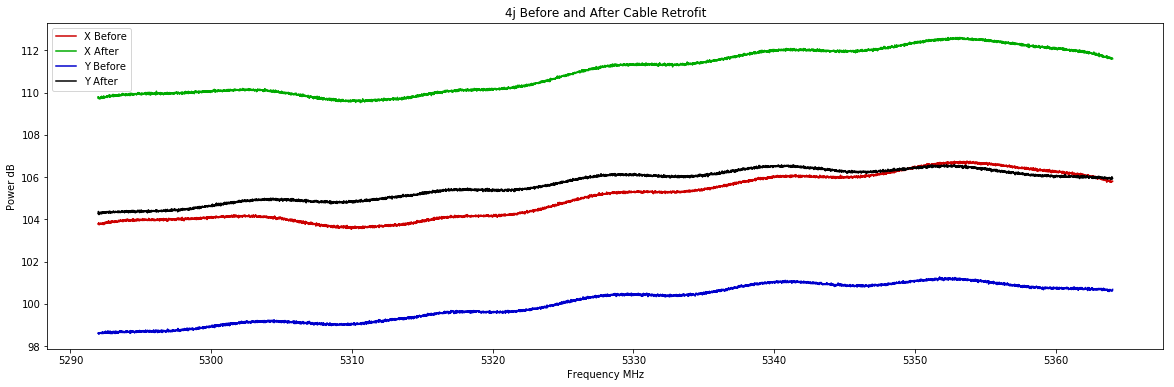

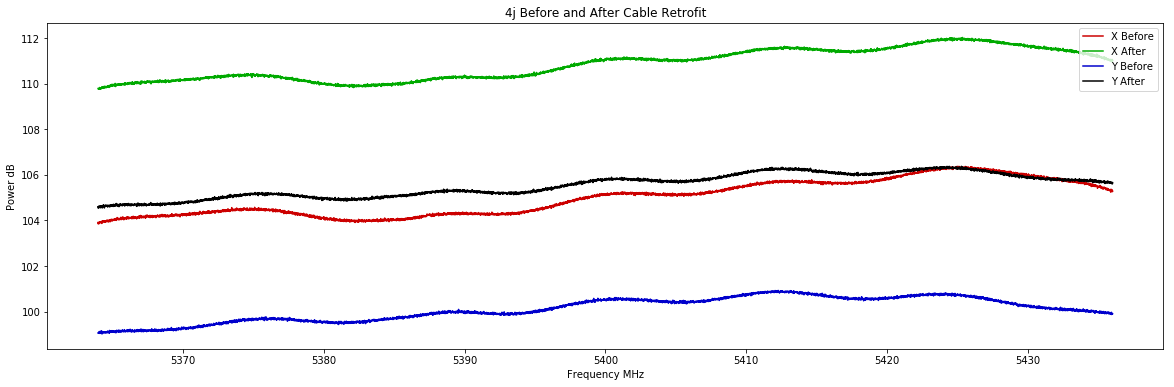

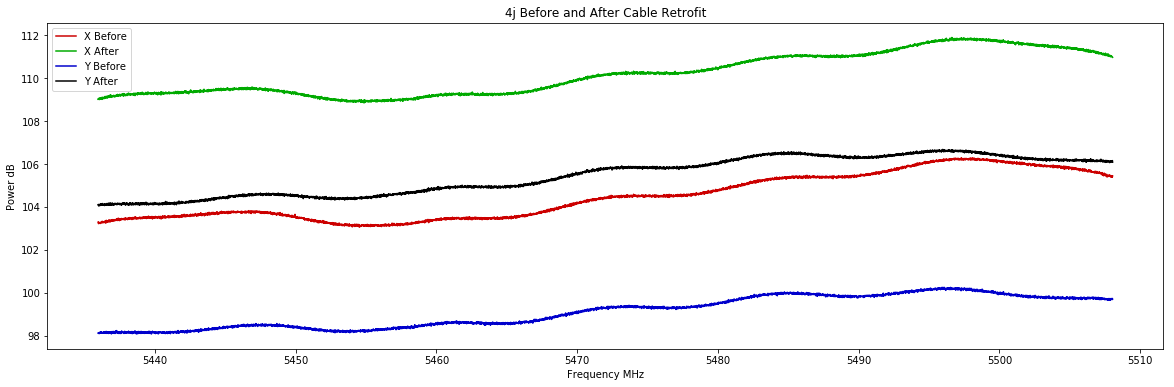

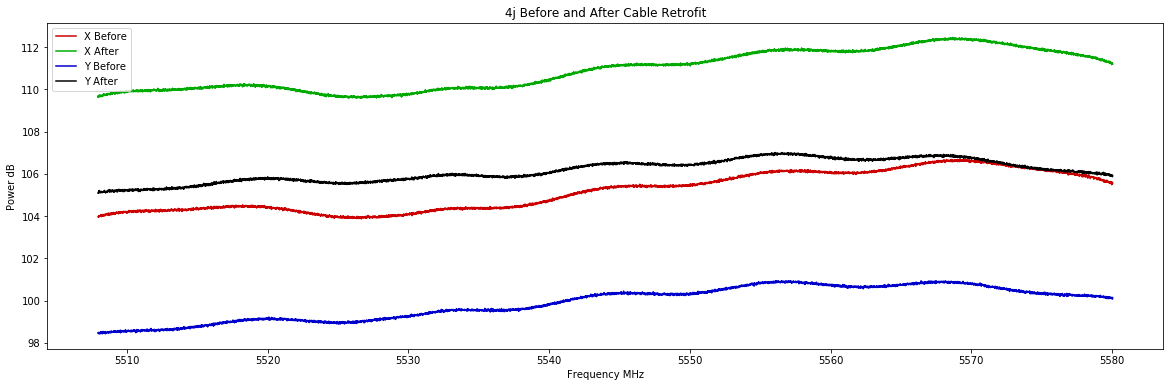

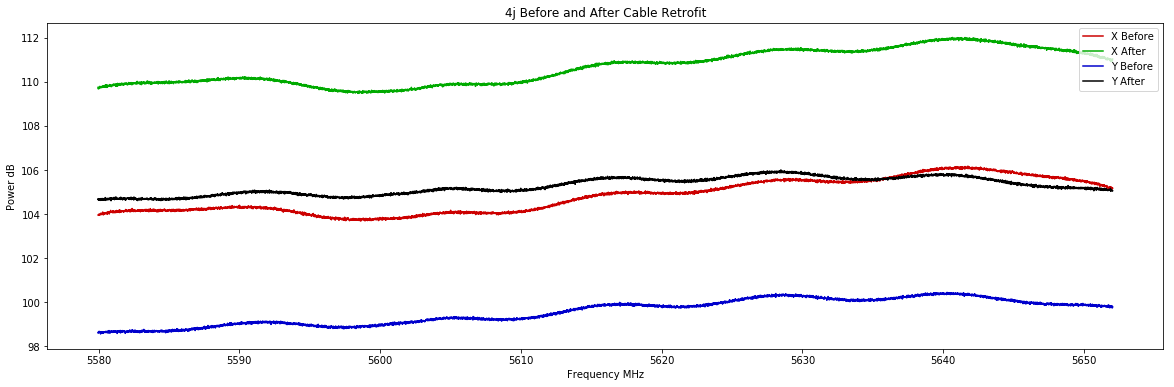

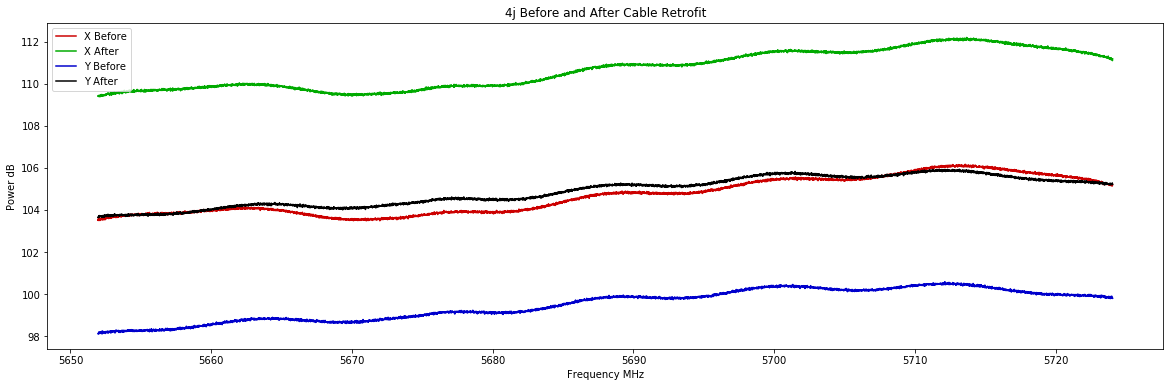

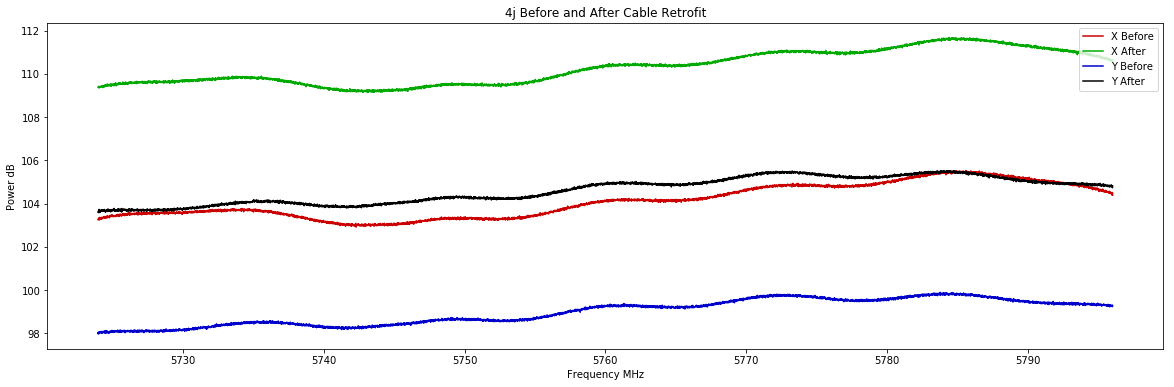

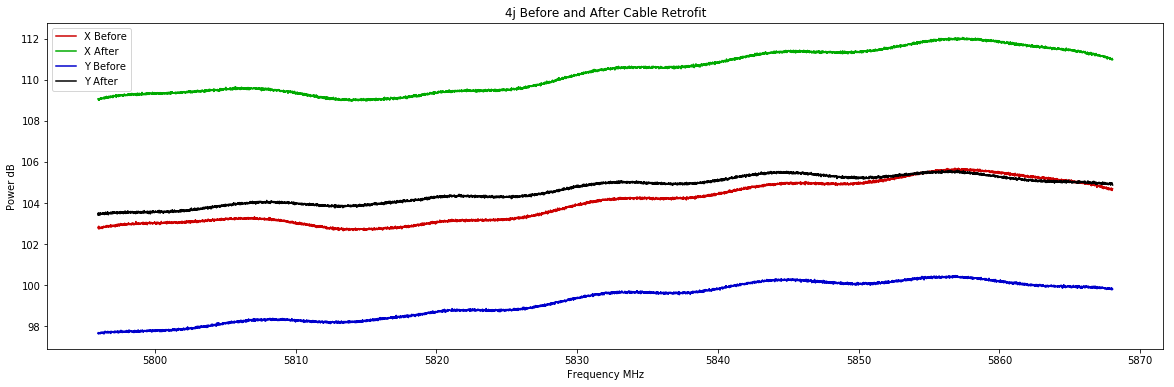

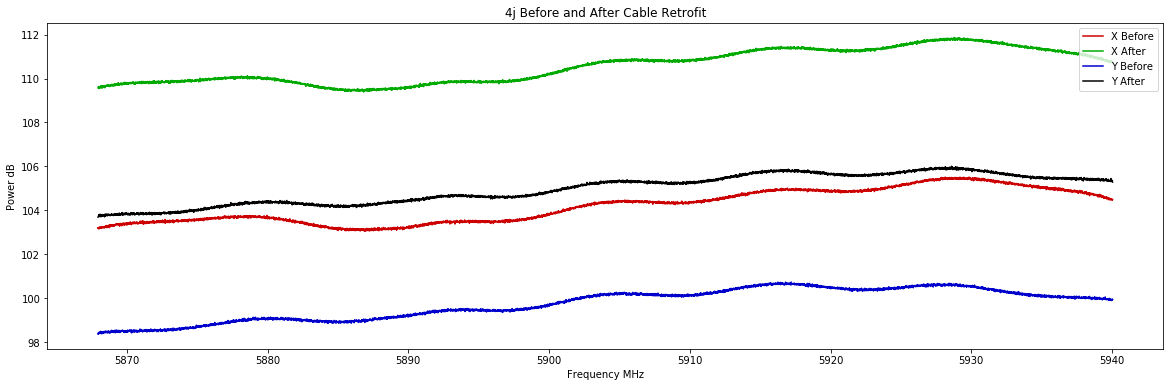

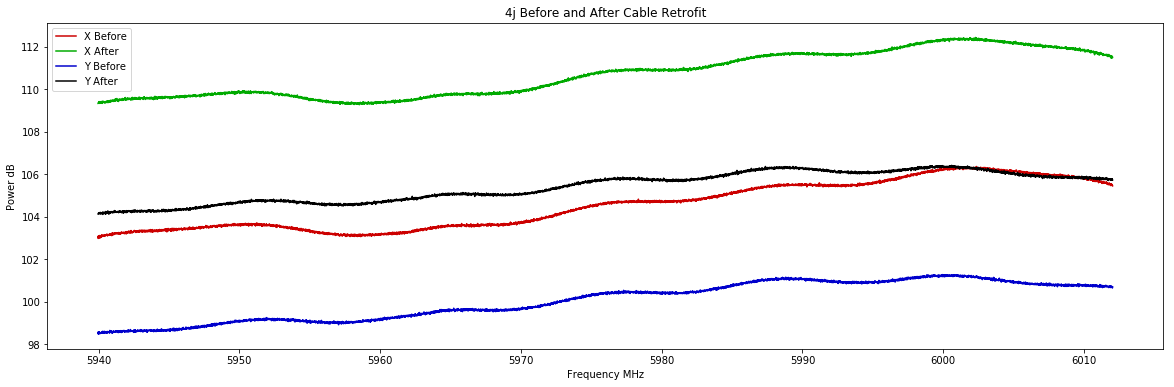

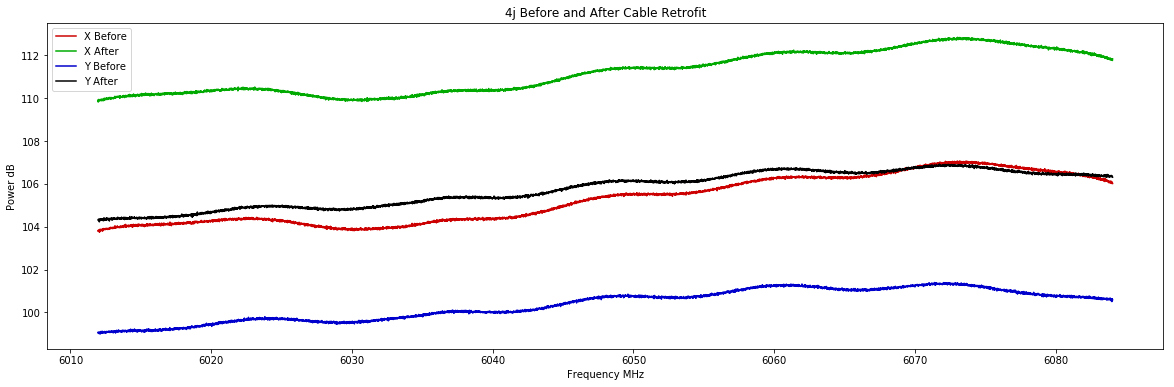

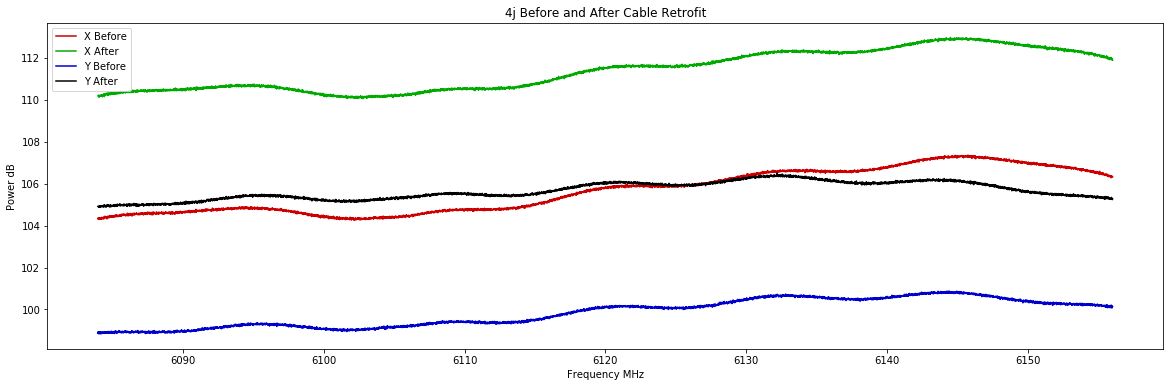

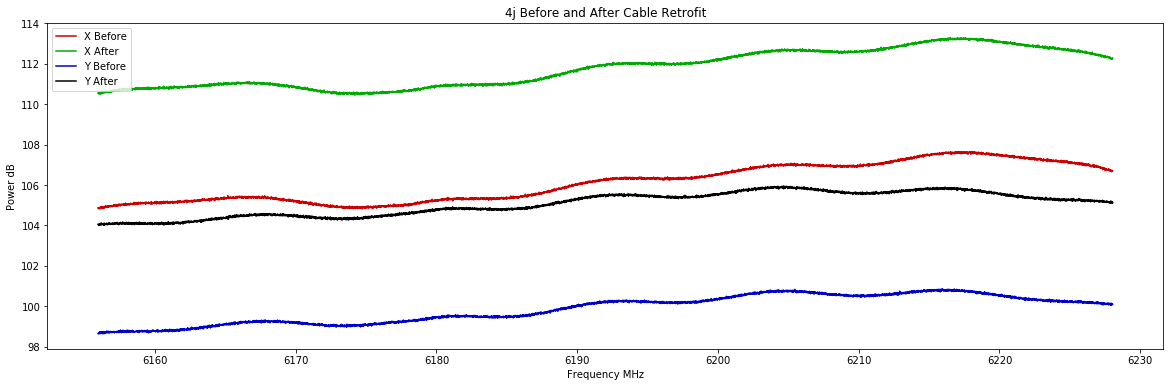

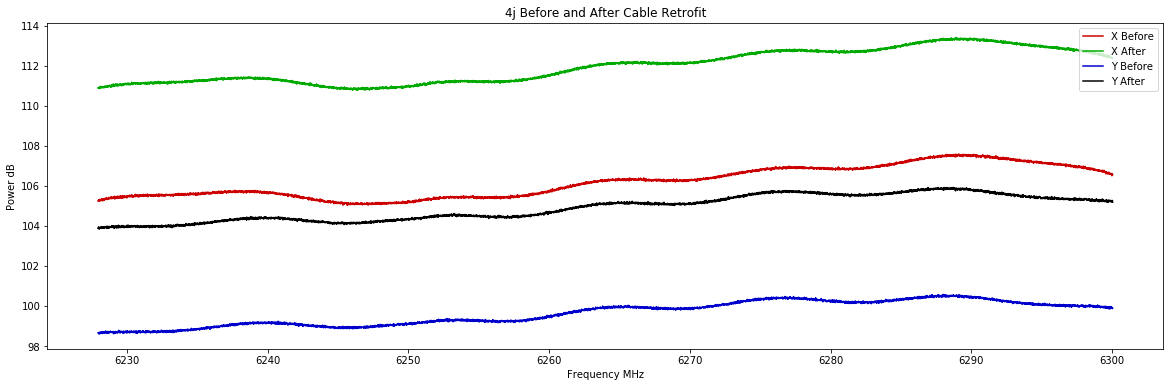

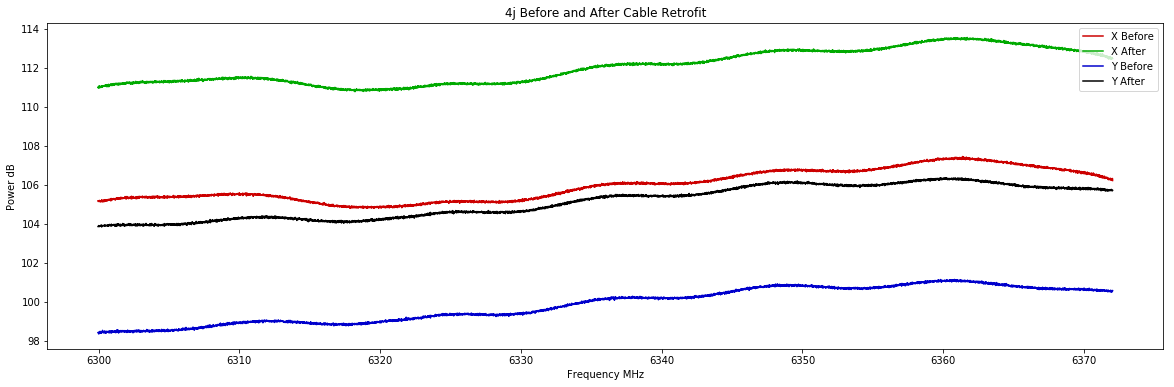

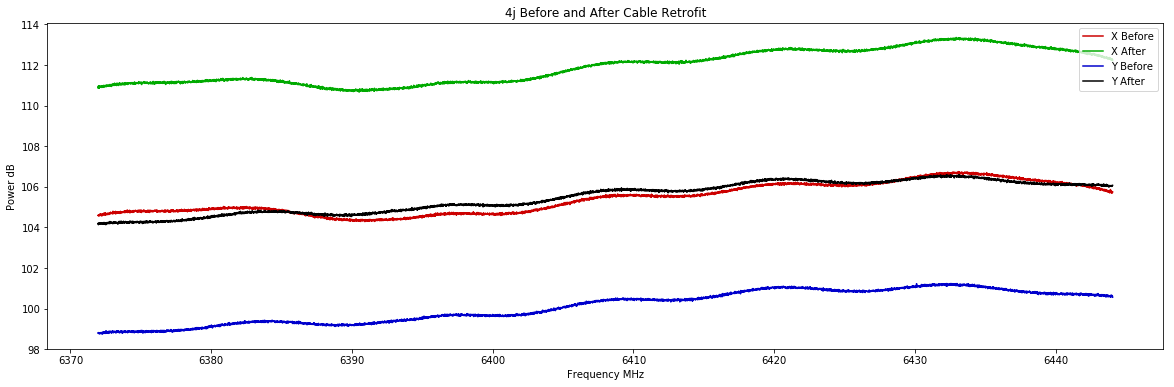

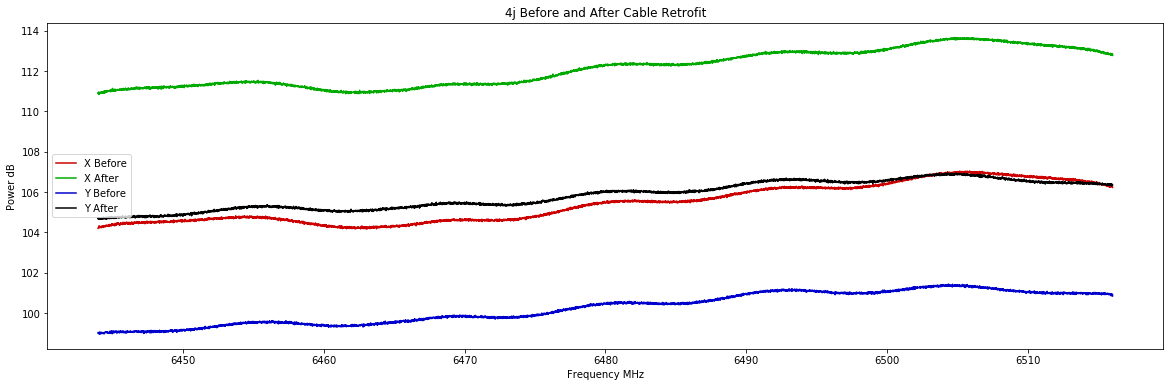

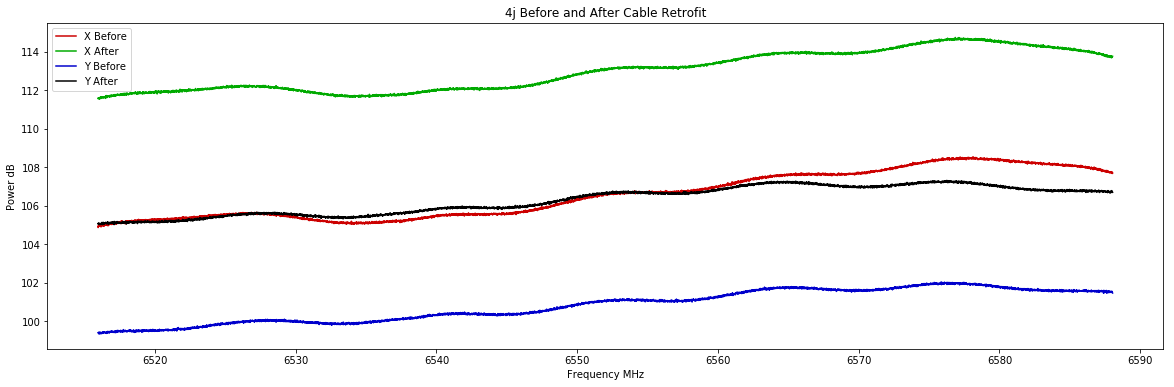

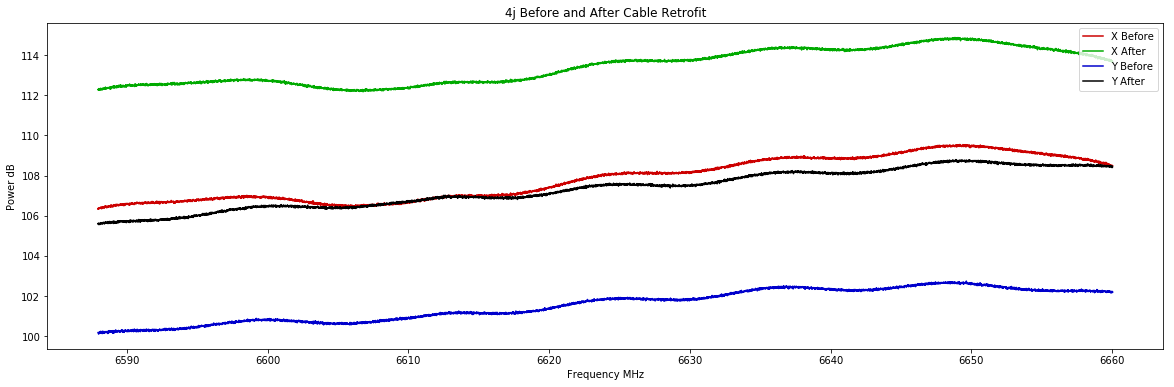

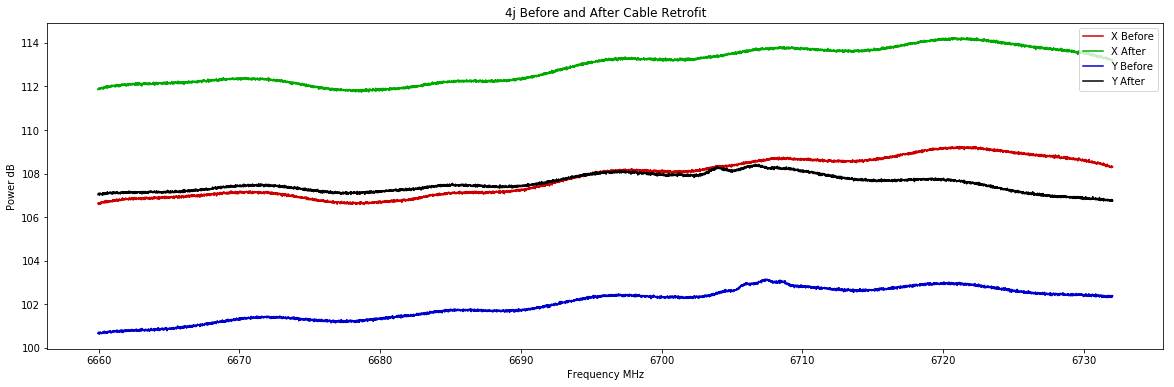

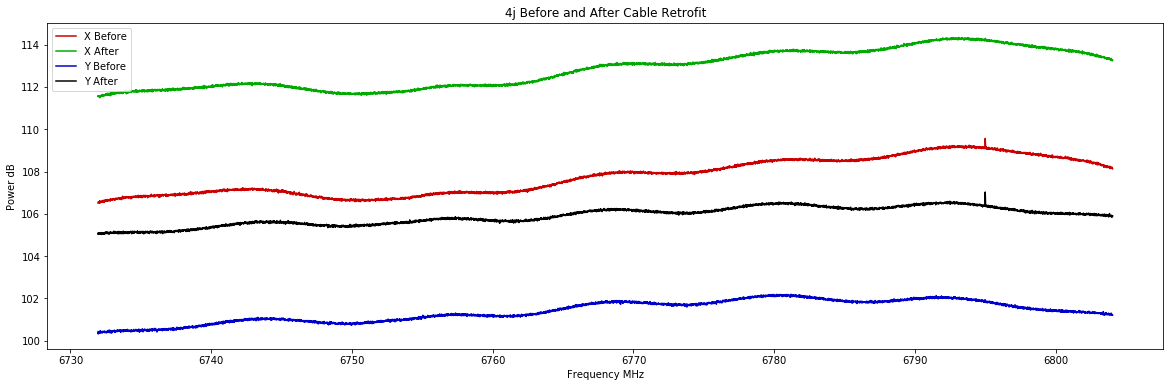

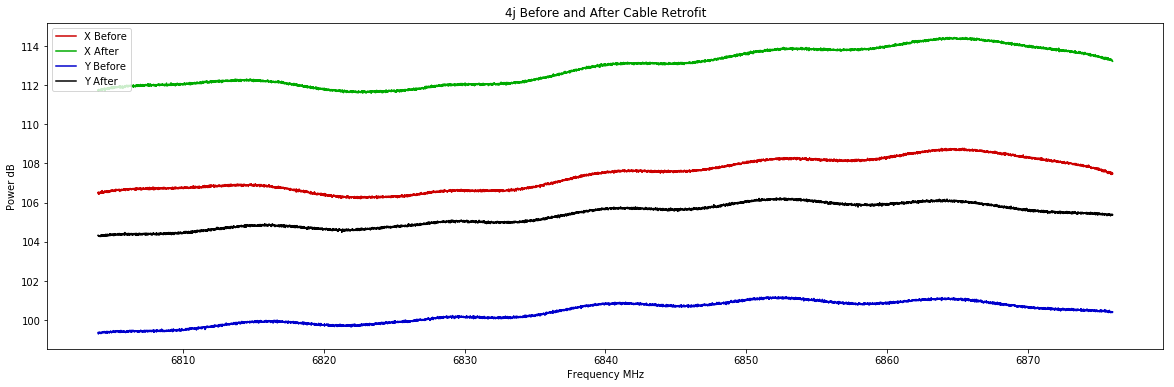

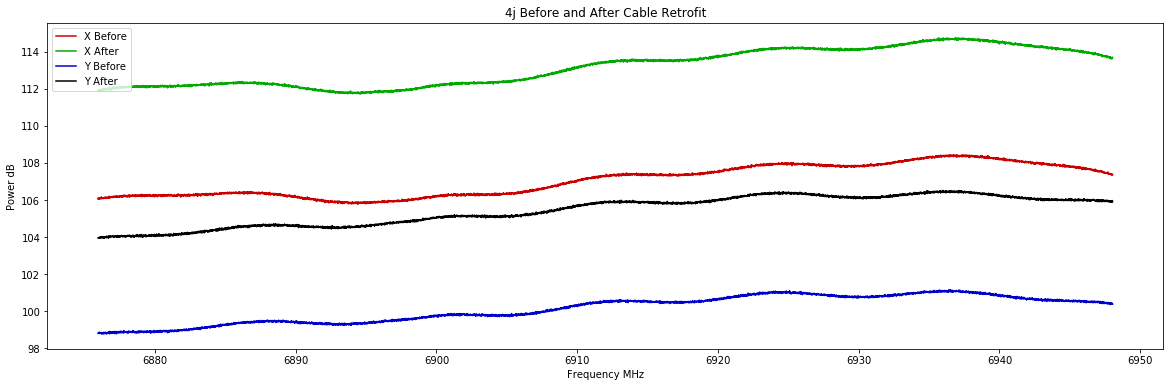

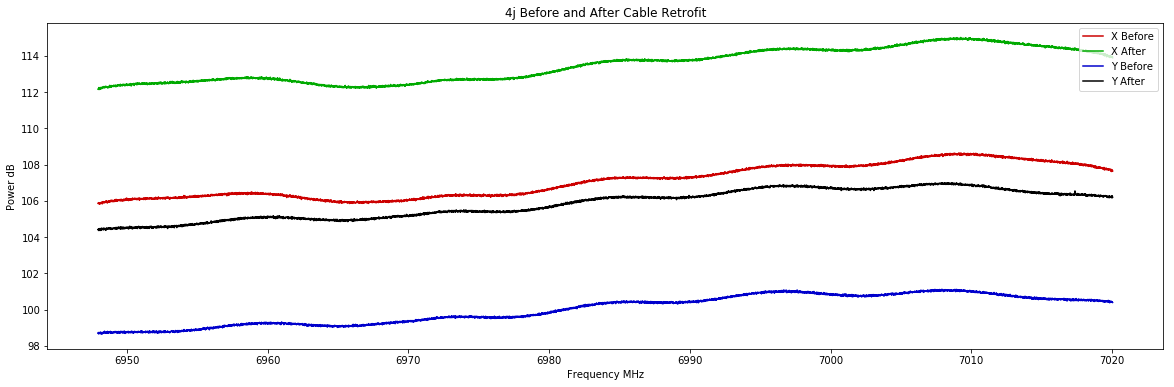

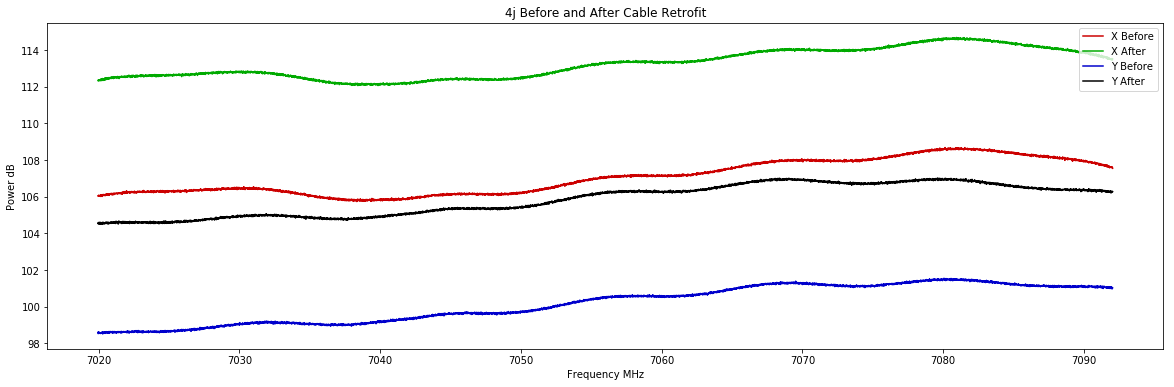

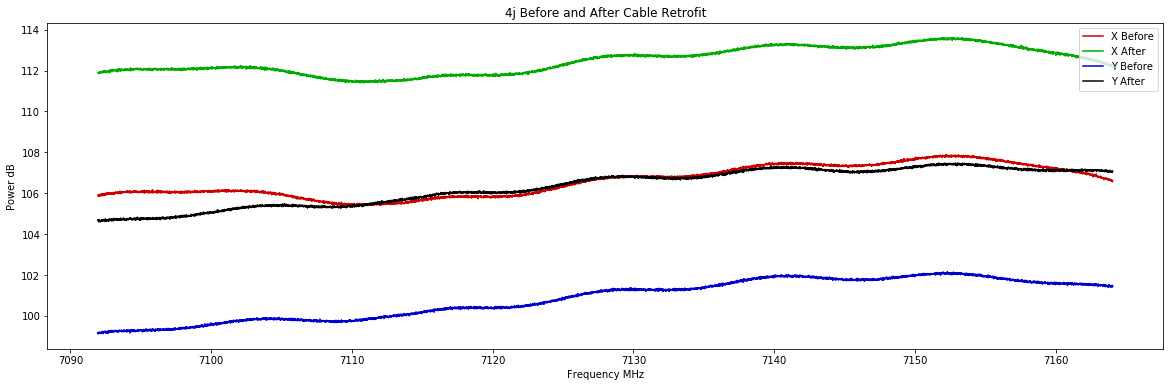

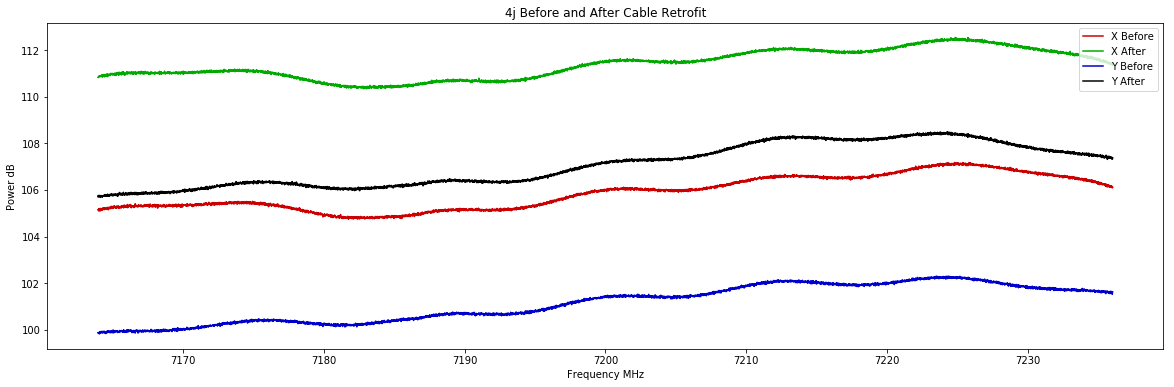

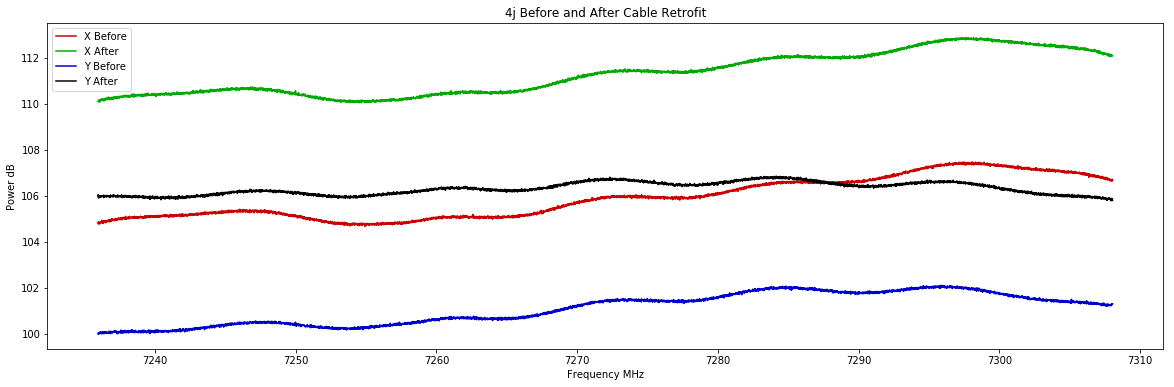

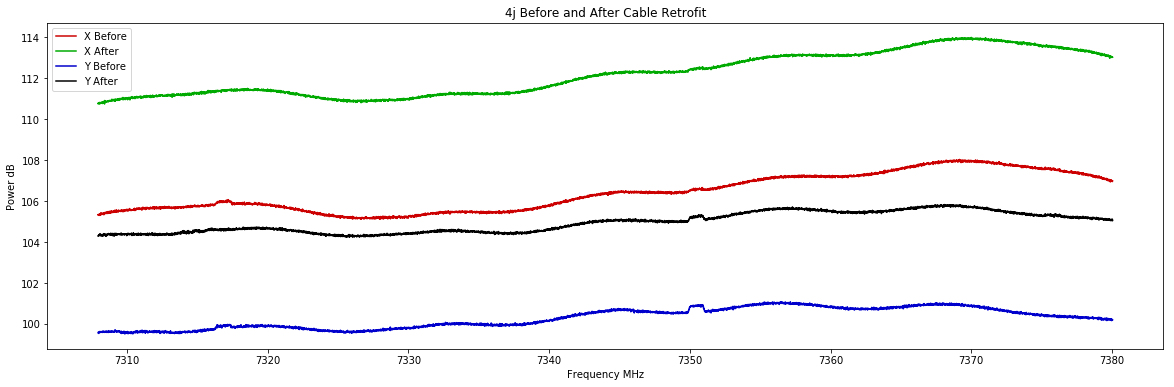

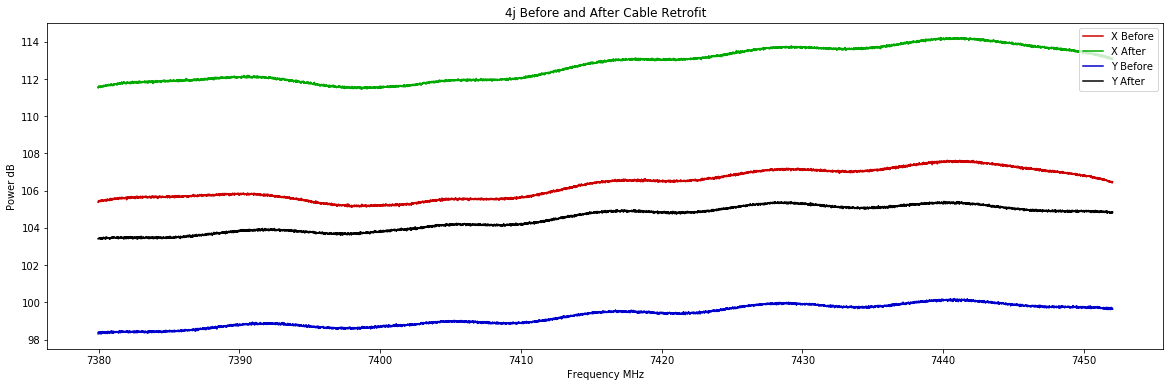

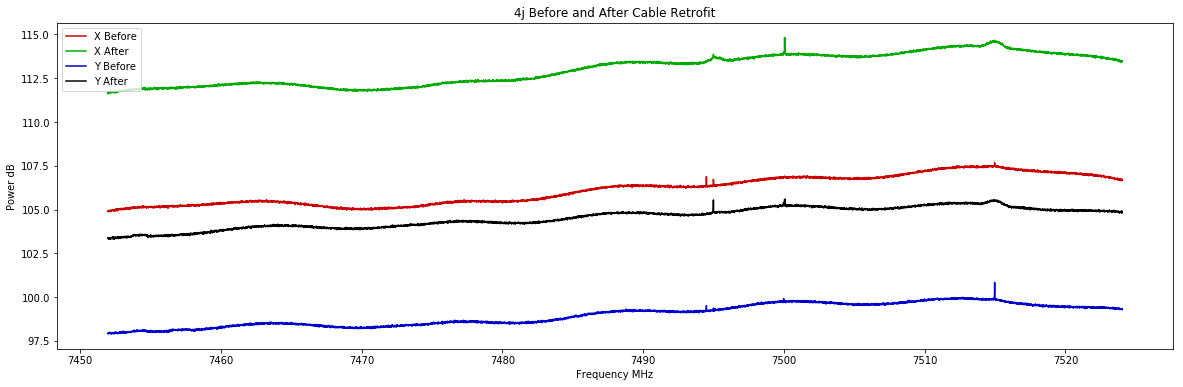

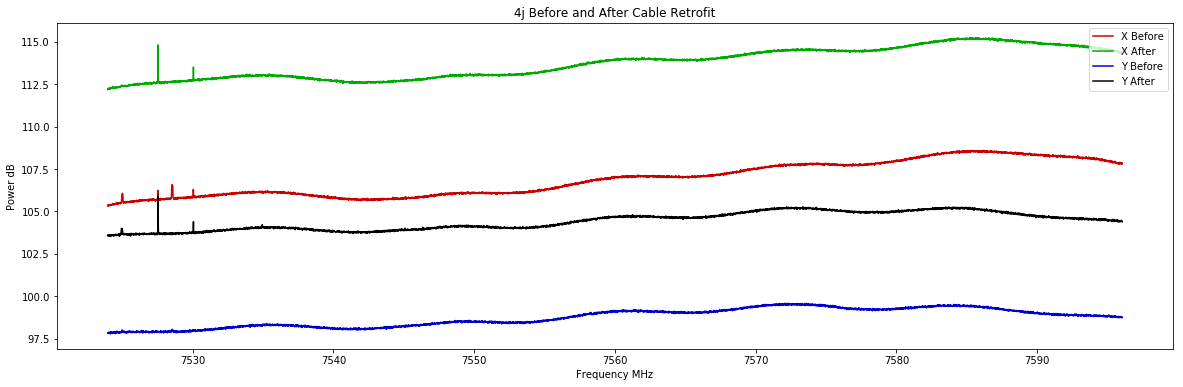

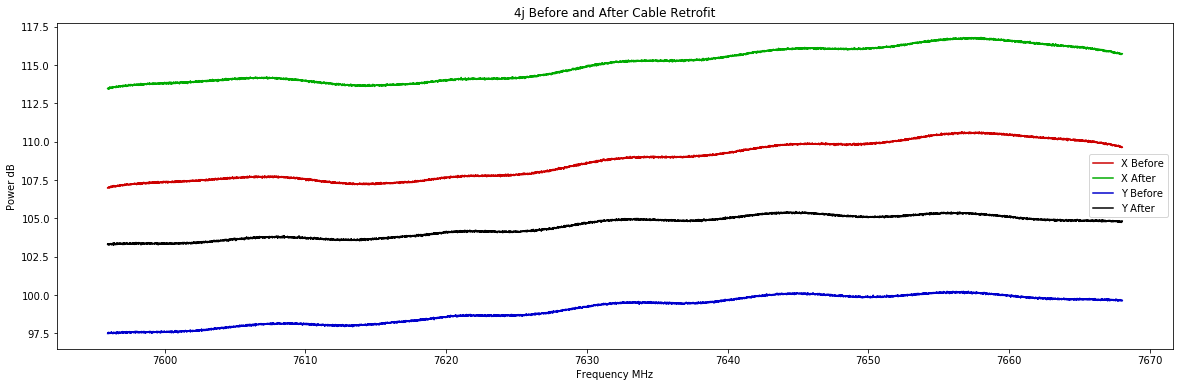

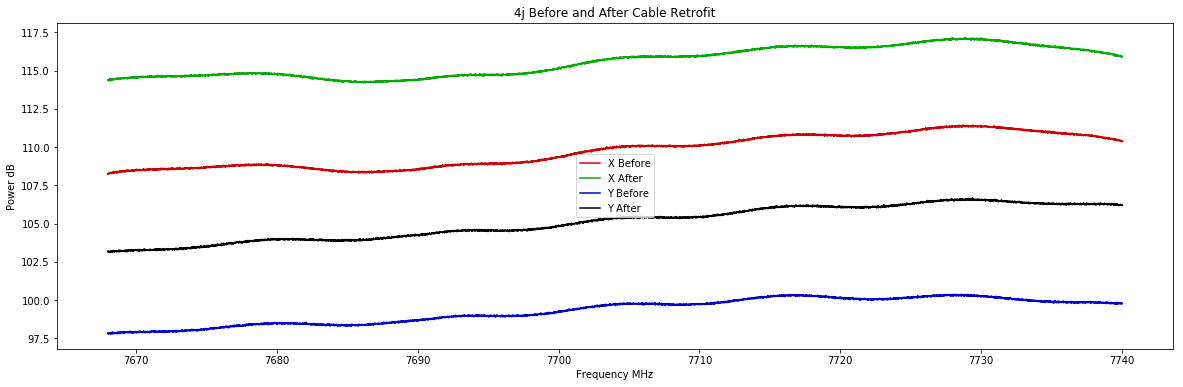

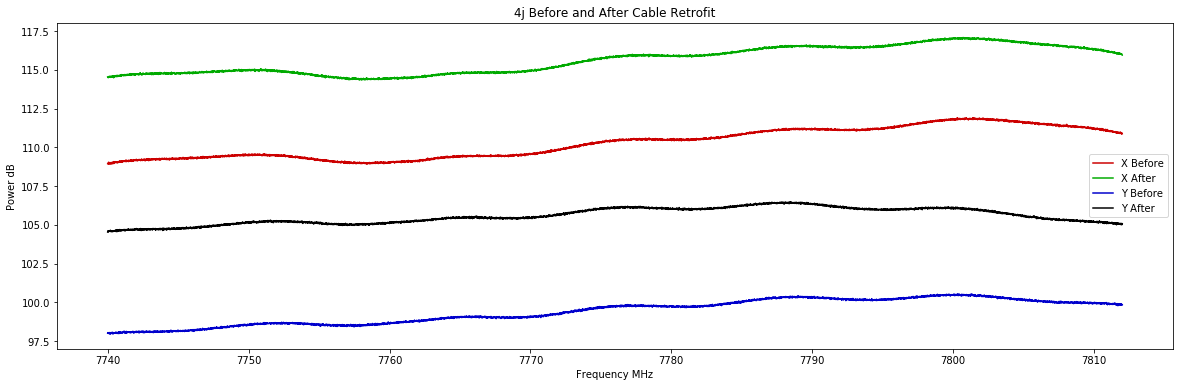

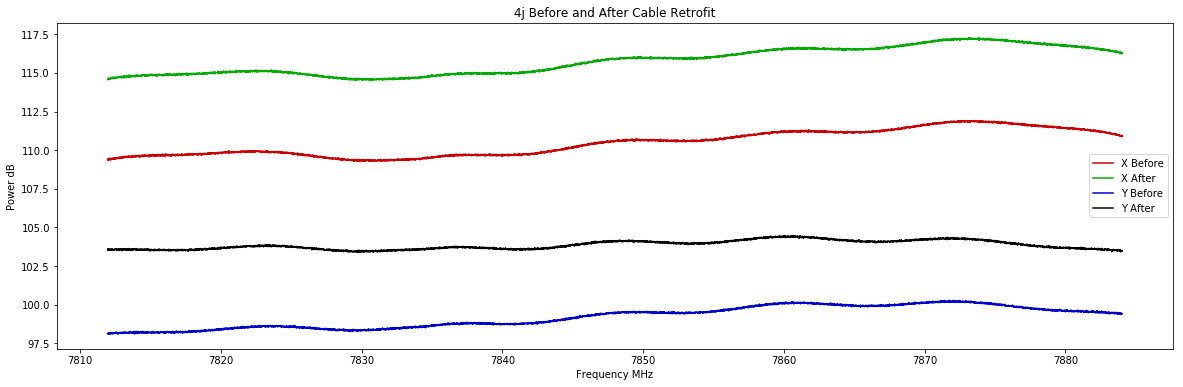

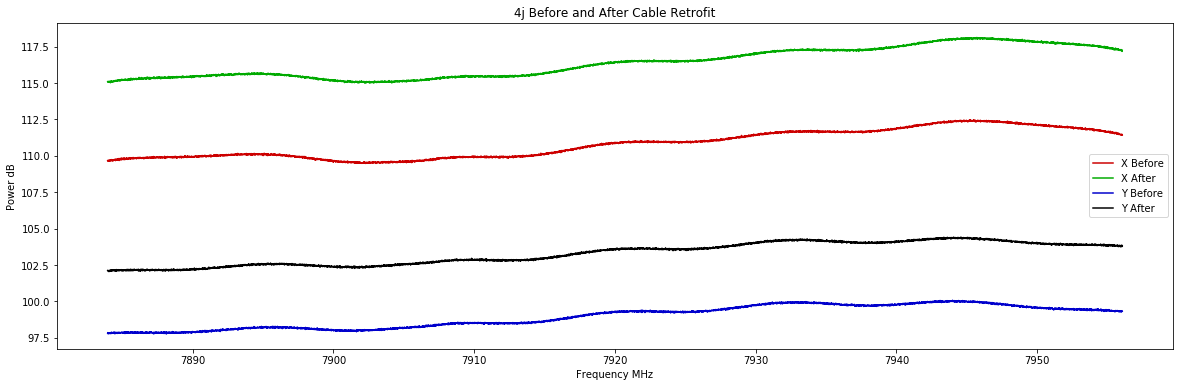

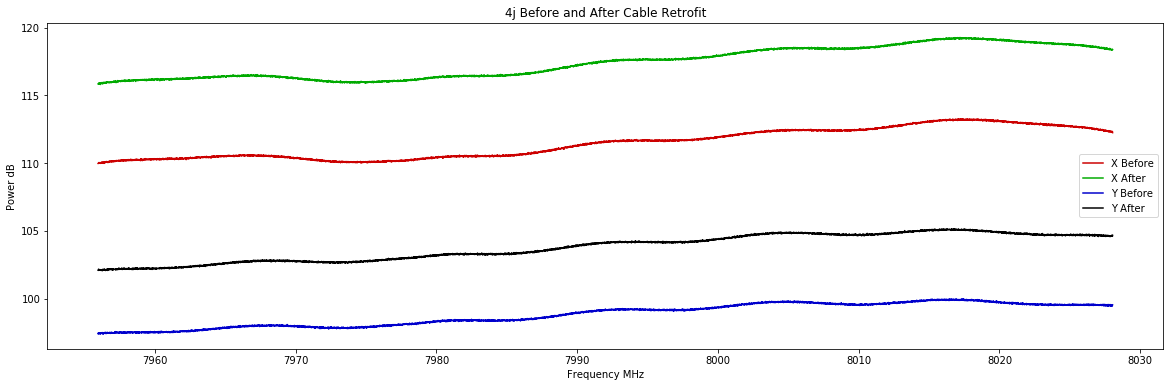

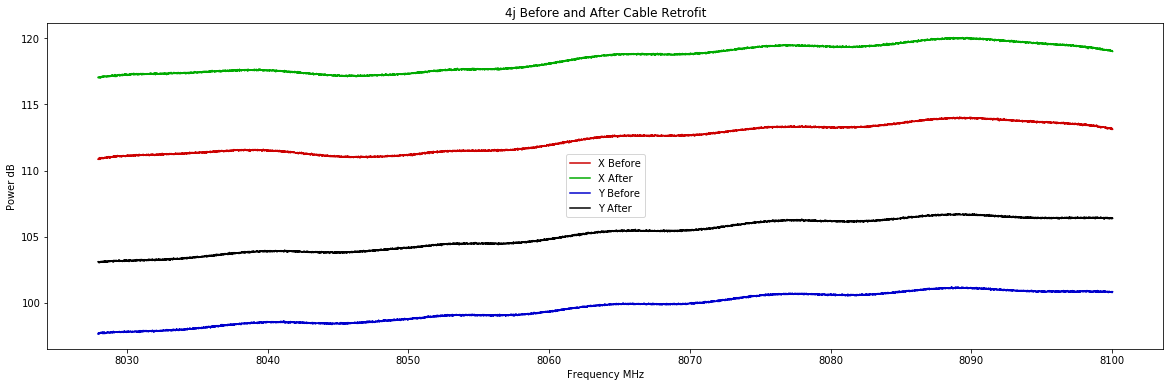

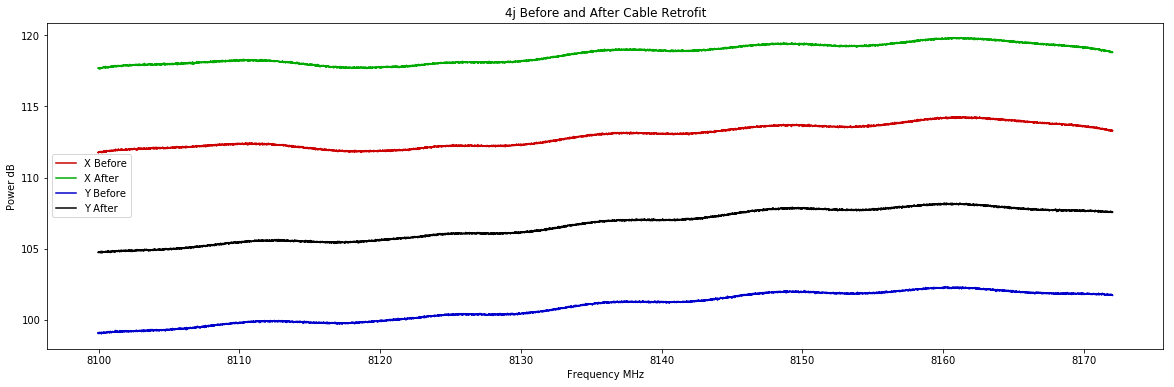

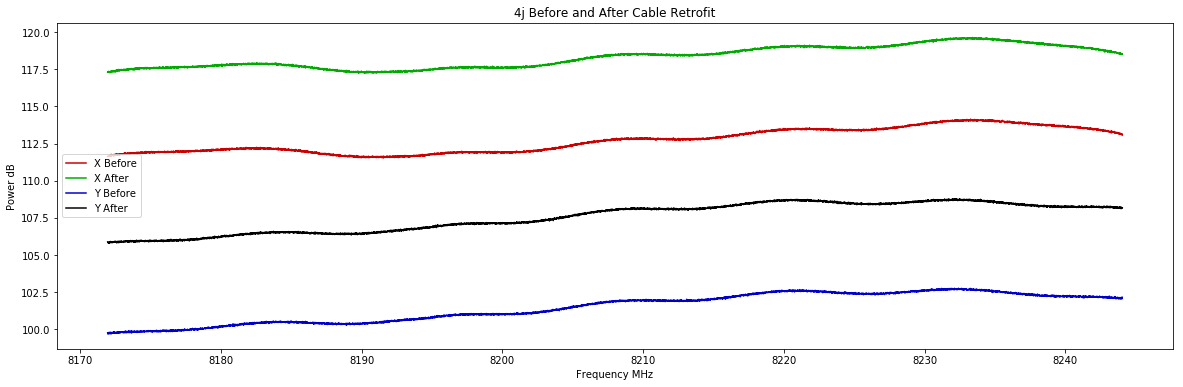

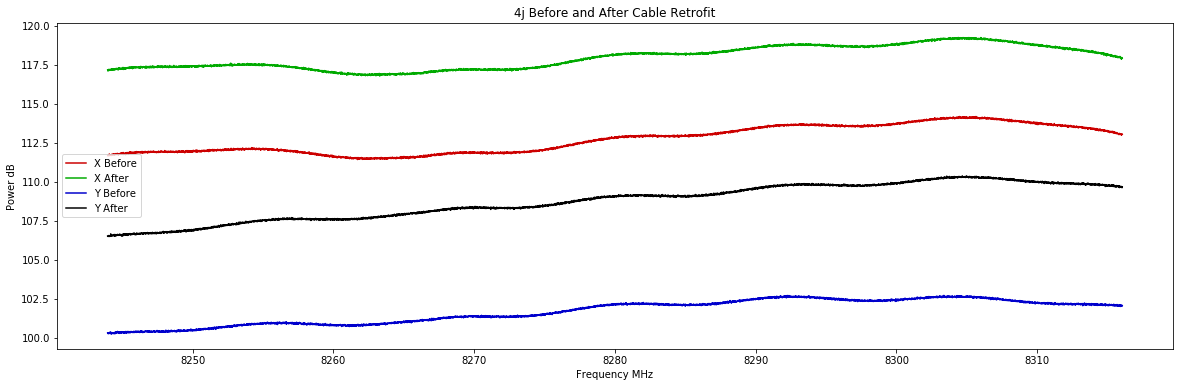

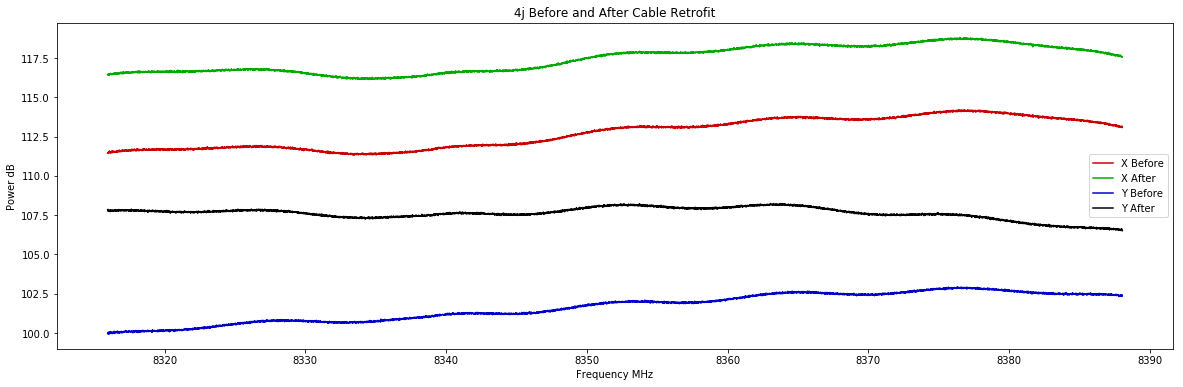

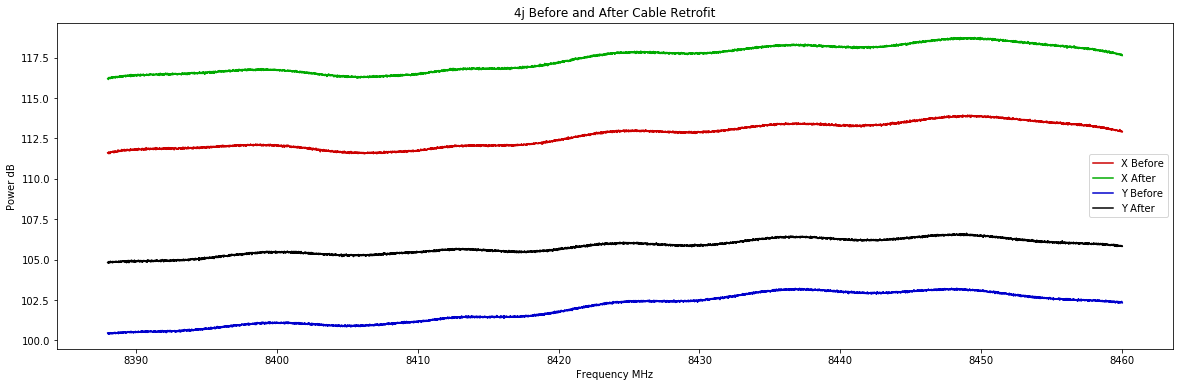

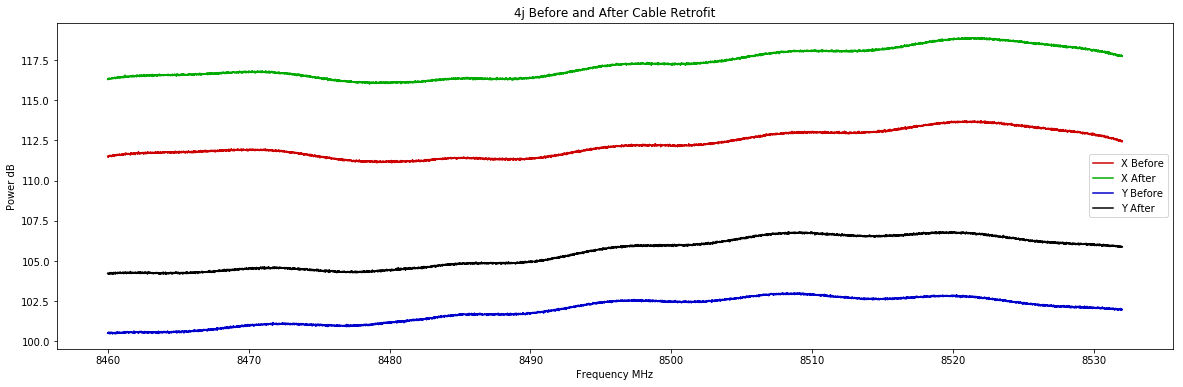

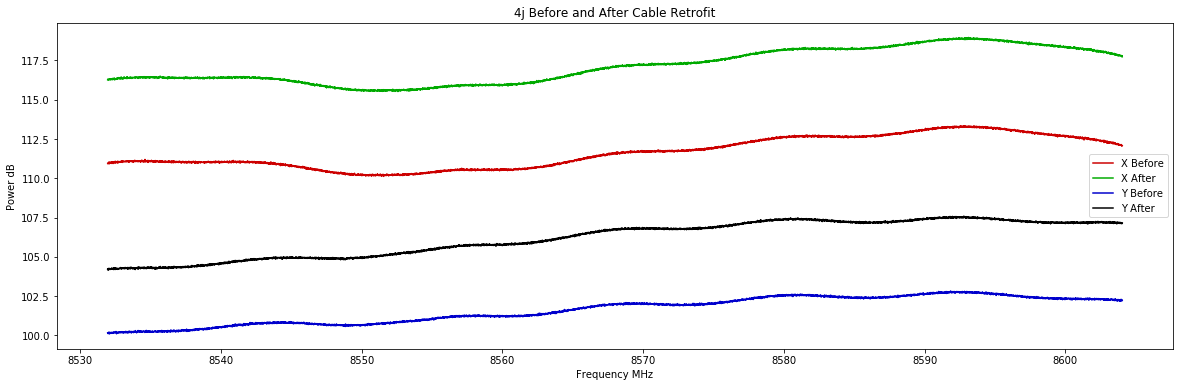

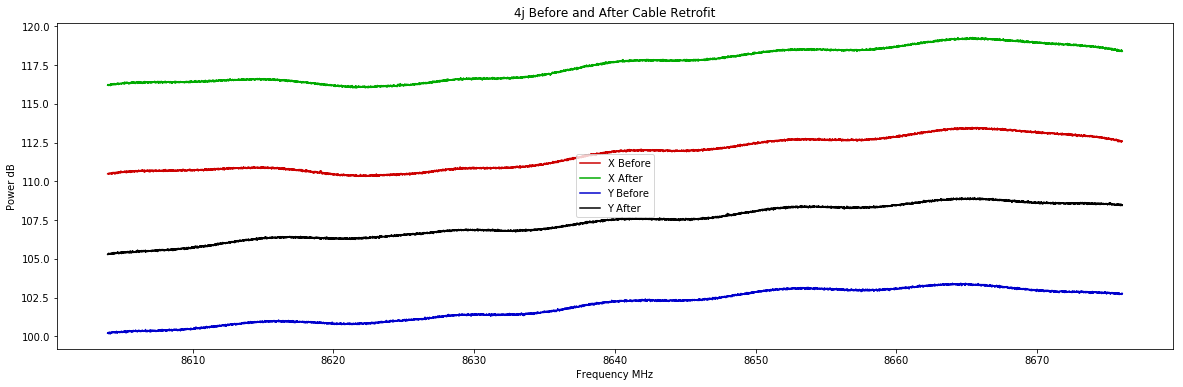

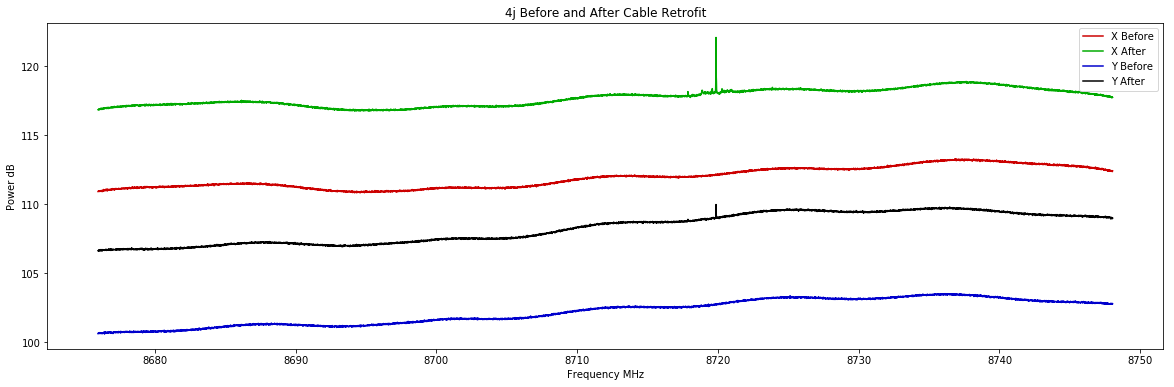

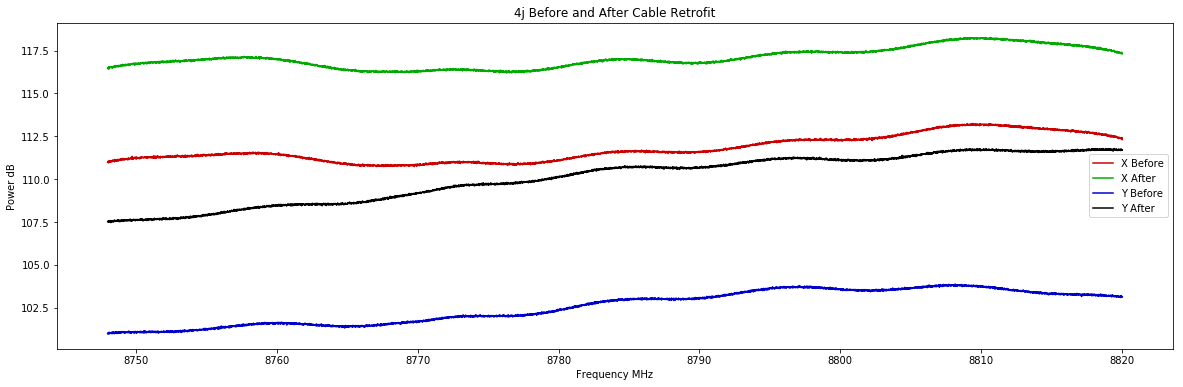

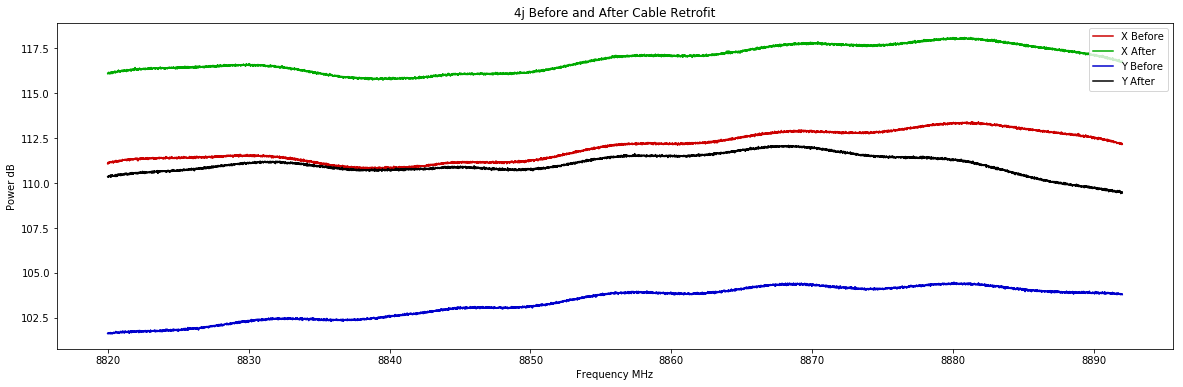

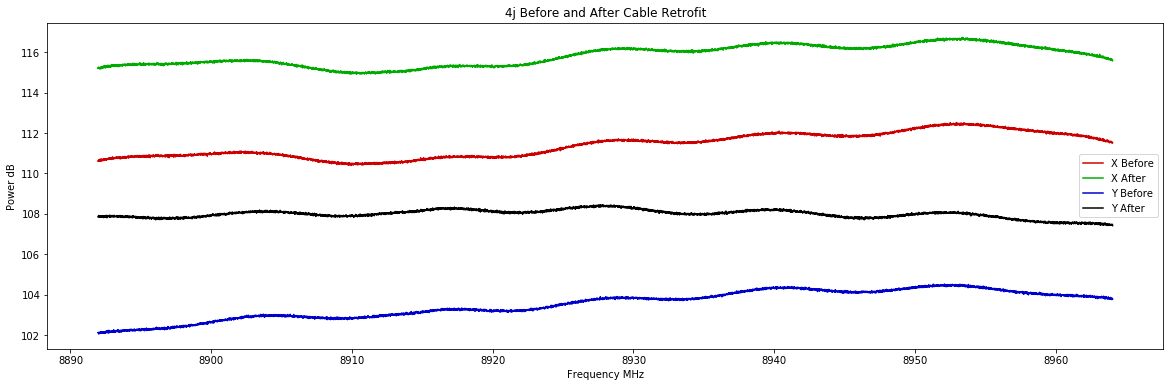

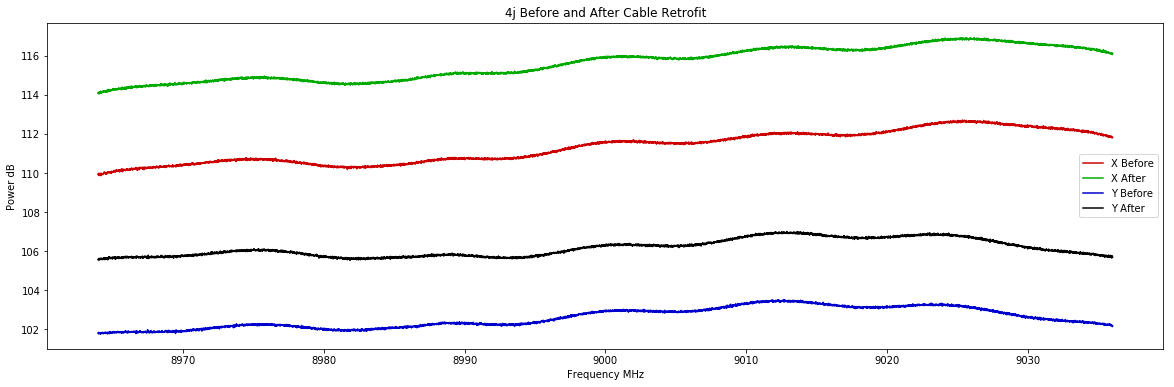

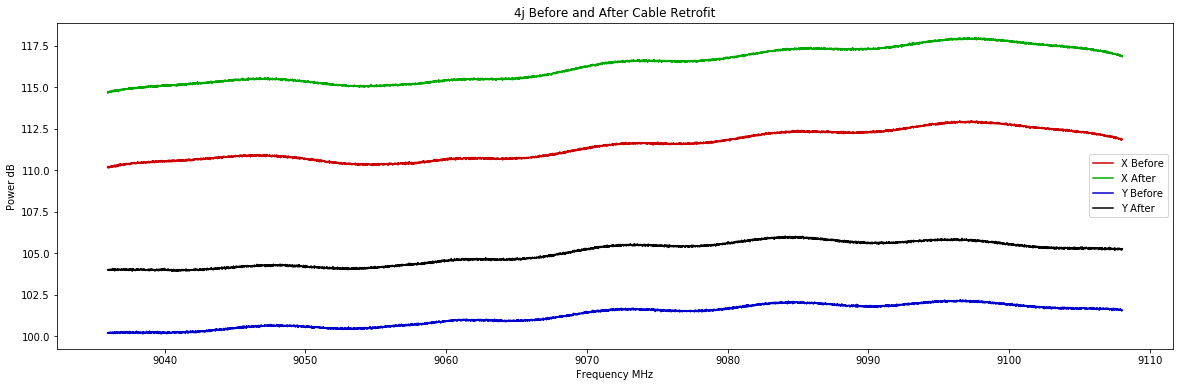

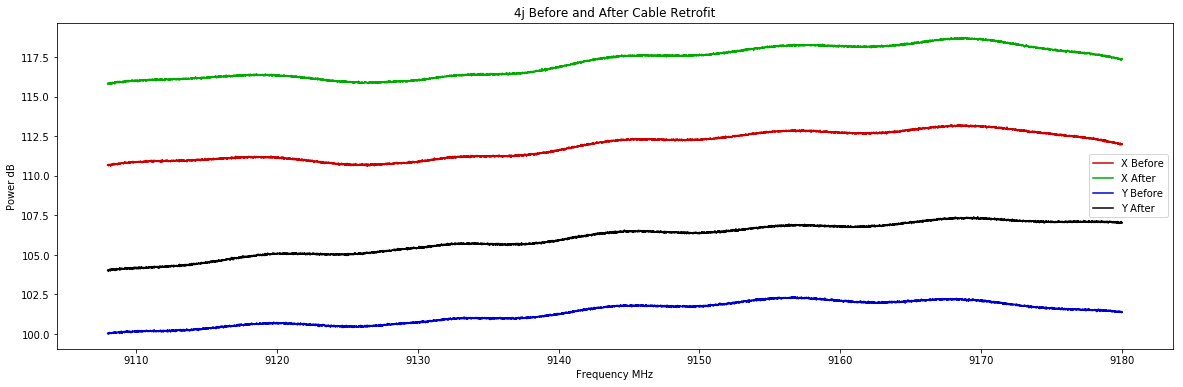

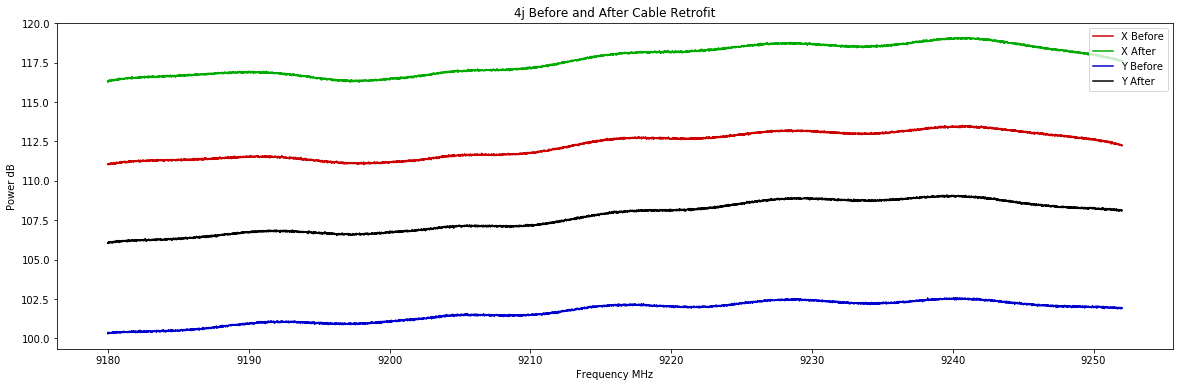

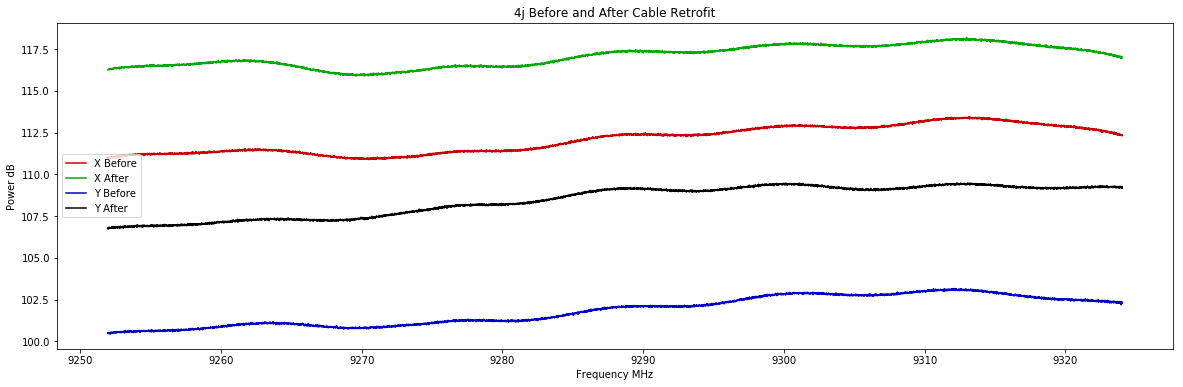

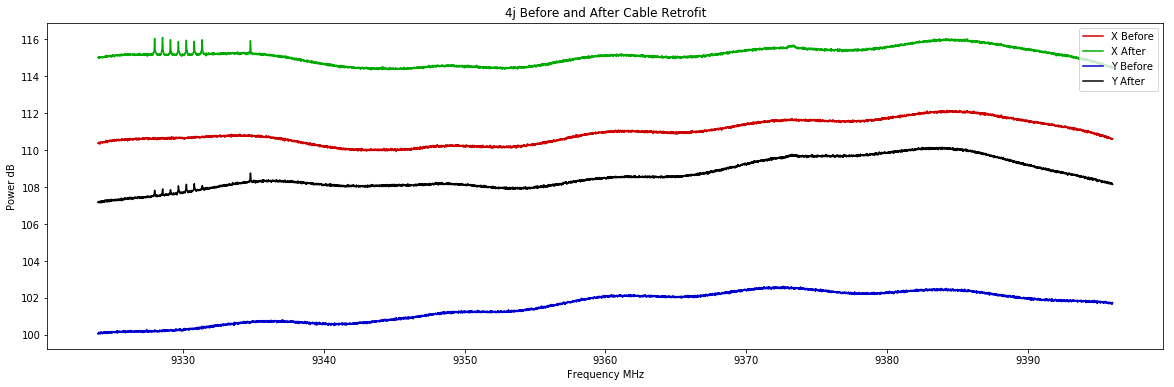

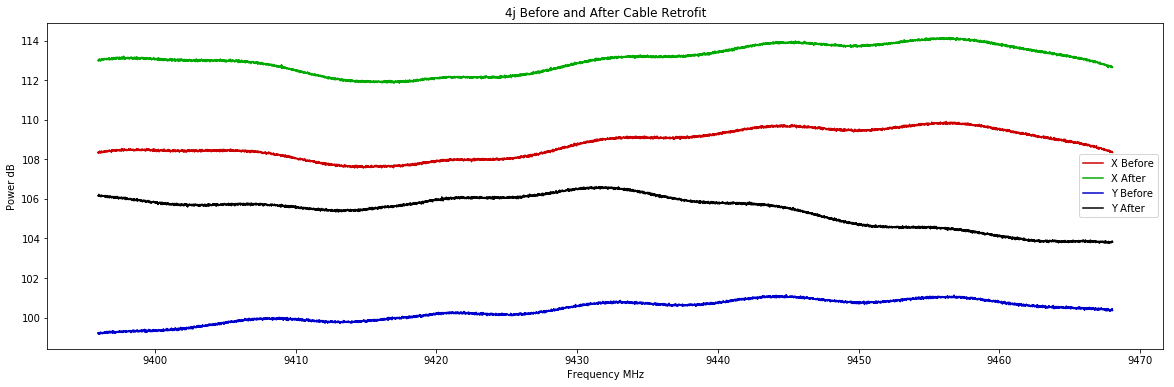

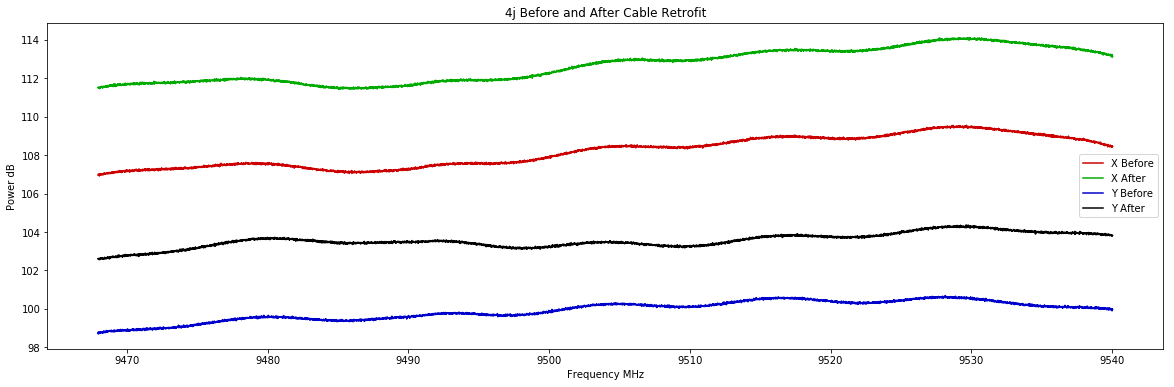

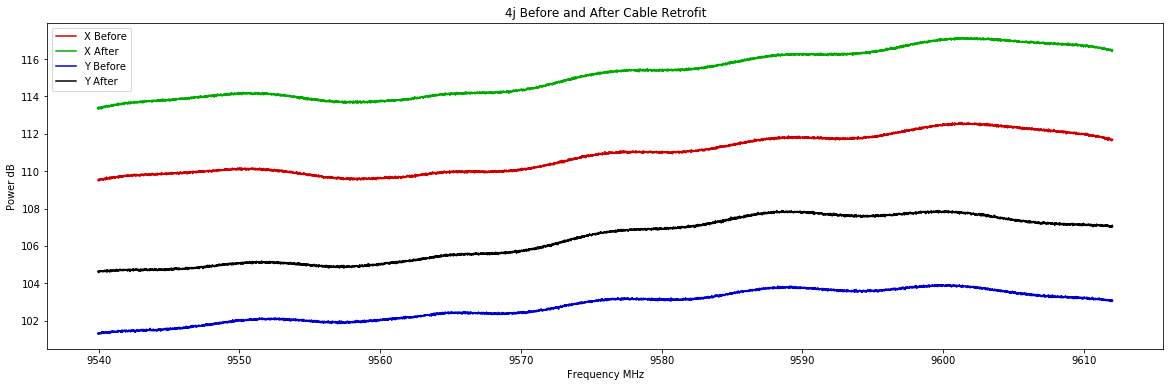

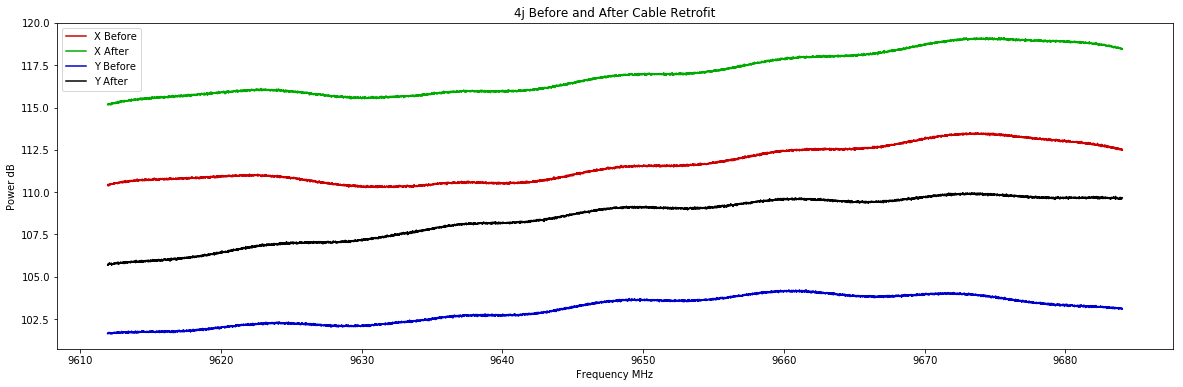

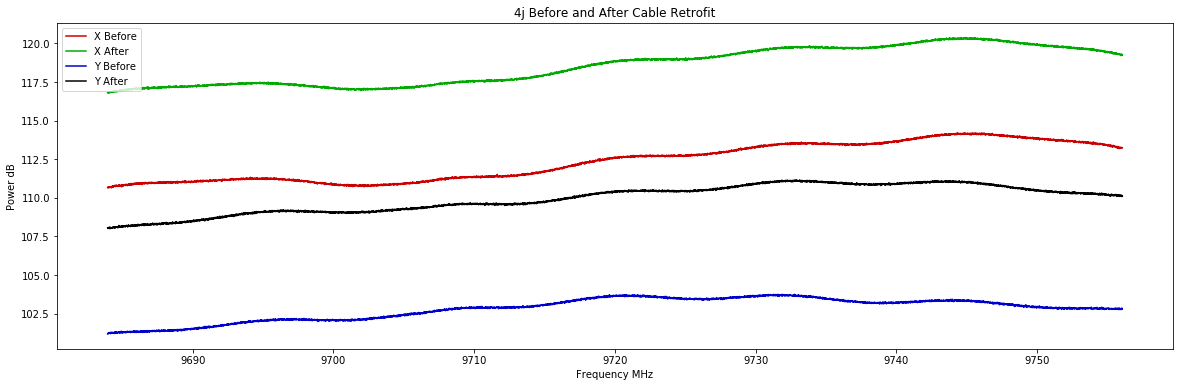

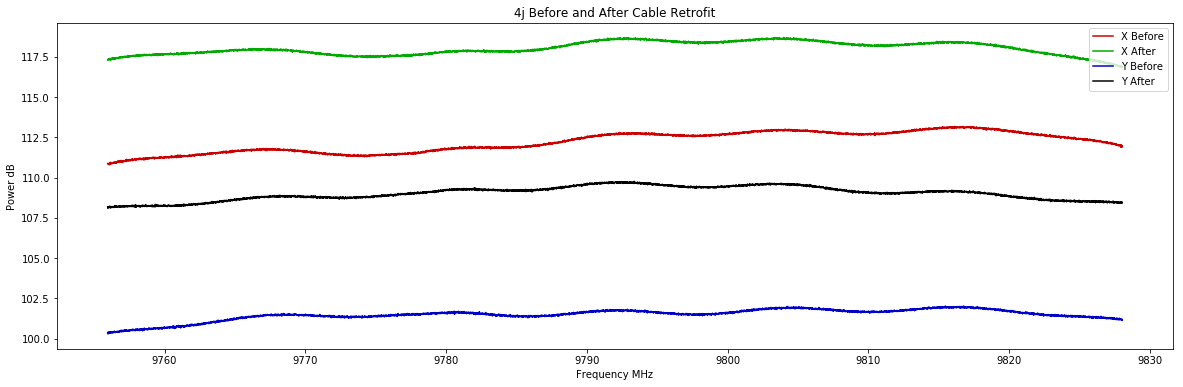

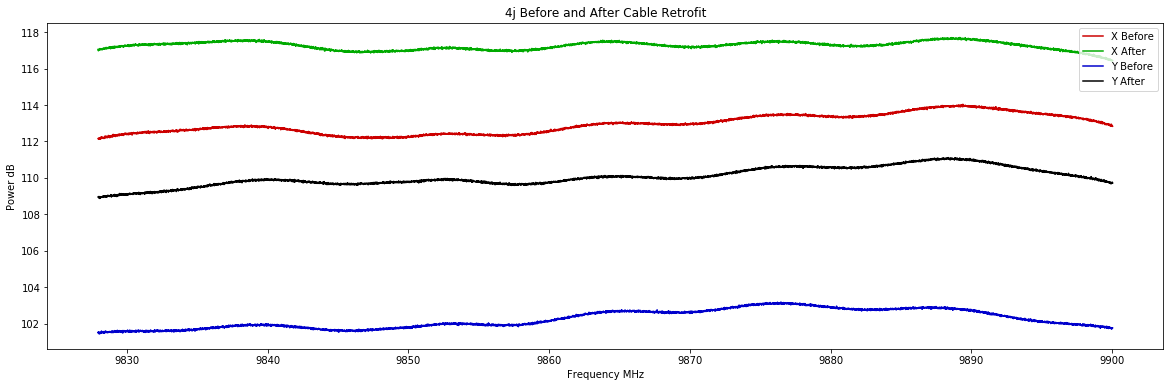

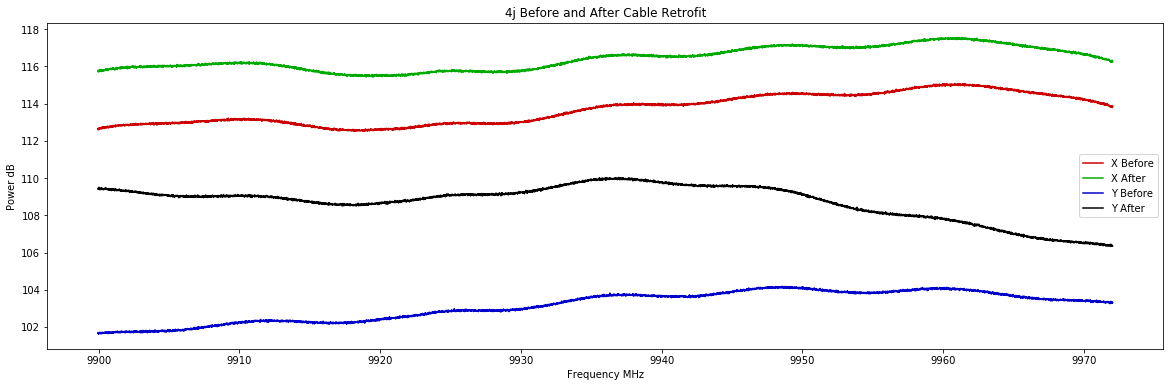

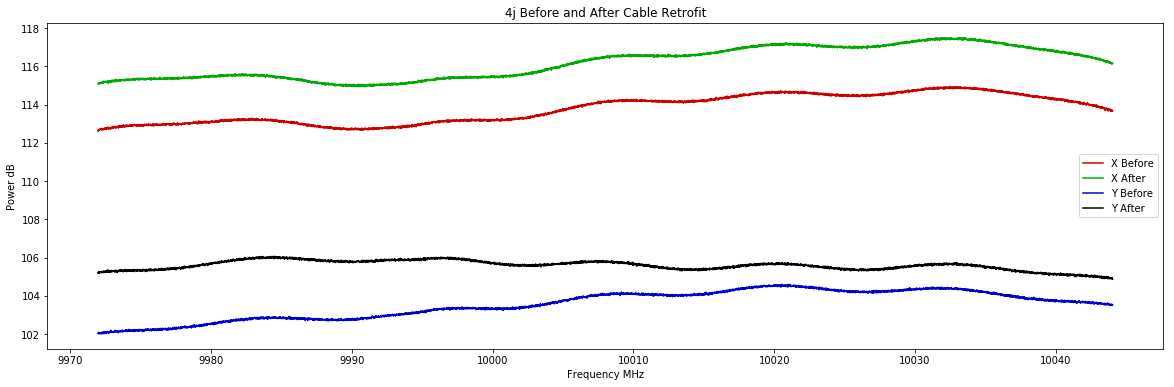

In [203]:
for freq in freq_list:
    
    before_x = Filterbank(data_dir + "/" + ant + "_x_before_" + str(int(freq)) + ".fil")
    after_x = Filterbank(data_dir + "/" + ant + "_x_after_" + str(int(freq)) + ".fil")
    before_y = Filterbank(data_dir + "/" + ant + "_y_before_" + str(int(freq)) + ".fil")
    after_y = Filterbank(data_dir + "/" + ant + "_y_after_" + str(int(freq)) + ".fil")
    
    # Get the frequency of each sample
    plot_f = before_x.freqs[..., ::-1]
    
    # Create the db of the data
    before_x_data = 10*np.log10(before_x.data[0][0][..., ::-1])
    after_x_data = 10*np.log10(after_x.data[0][0][..., ::-1])
    before_y_data = 10*np.log10(before_y.data[0][0][..., ::-1])
    after_y_data = 10*np.log10(after_y.data[0][0][..., ::-1])
    
    # Cut out DC
    dc_index = int(len(before_x.data[0][0])/2) - 1
    before_x_data[dc_index] = before_x_data[dc_index - 1]
    after_x_data[dc_index] = after_x_data[dc_index - 1]
    before_y_data[dc_index] = before_y_data[dc_index - 1]
    after_y_data[dc_index] = after_y_data[dc_index - 1]
    
    # Cut out the upper and lower dropoff. The middle 68.75pct remains
    num_samples = len(plot_f)
    cut_num_samples = int(len(plot_f) * 0.6875)
    cut_start_index = int((num_samples - cut_num_samples) / 2)
    
    plot_f = plot_f[cut_start_index:cut_start_index+cut_num_samples]
    before_x_data = before_x_data[cut_start_index:cut_start_index+cut_num_samples]
    after_x_data = after_x_data[cut_start_index:cut_start_index+cut_num_samples]
    before_y_data = before_y_data[cut_start_index:cut_start_index+cut_num_samples]
    after_y_data = after_y_data[cut_start_index:cut_start_index+cut_num_samples]

    plt.plot(plot_f, before_x_data, c='#cc0000', label='X Before')
    plt.plot(plot_f, after_x_data, c='#00aa00', label='X After')
    plt.plot(plot_f, before_y_data, c='#0000cc', label='Y Before')
    plt.plot(plot_f, after_y_data, c='#000000', label='Y After')
    plt.title(ant + ' Before and After Cable Retrofit')
    plt.ylabel('Power dB')
    plt.xlabel('Frequency MHz')
    plt.legend()

    plt.savefig(images_dir + '/' + ant + '_' + str(freq) + '.png')
    
    plt.show()

In [214]:
# Create the HTML file
f = open("index.html", "w")
f.write("<HTML>\n")
f.write("<BODY>\n")

f.write('<h1>4j - Before and after Cable Retrofit</h1>\n')
f.write('<p>Data taken with the beamformer, ant 4j only, pointed to Azimuth 0.0 (North) and Elevation 33.0 degrees</p>\n')
f.write('<p>The data is available <a href=\"data.tar.Z\">HERE</a>, 30MB filterbank format<p>\n')
f.write('<p>Beamformer data was 104.8576MHz, approximately 2 seconds of data gathered per frequency selection. First second integrated. FFT size 8192, producing channels 12,800 Hz wide. Then saved as a filterbank file.</p>\n')

for freq in freq_list:
    
    image_name = images_dir[2:] + '/' + ant + '_' + str(freq) + '.png'
    html = '\t<img src=\"'+ image_name + '\" >\n'
    f.write(html)
    f.write("\t<br>\n")
    
f.write("<BODY>\n")
f.write("<HTML>\n")
f.close()
